# Kickstarter Projects

Kickstarter PBC is a funding platform for creative projects. Everything from films, games, and music to art, design, and technology. Everything on Kickstarter must be a project with a clear goal, like making an album, a book, or a work of art. A project will eventually be completed, and something will be produced by it.<br>
<br>
Kickstarter is not a store, backers pledge to projects to help them come to life and support a creative process. To thank their backers for their support, project creators offer unique rewards that speak to the spirit of what they're hoping to create.

## 1. Data preparation

## Downloads

In [1]:
# Packages
# Install a pip package in the current Jupyter kernel

import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install --user -U nltk
!{sys.executable} -m pip install lightgbm
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install country_converter --upgrade
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install seaborn

#conda install -c anaconda nltk
#conda install -c conda-forge lightgbm
#conda install -c conda-forge wordcloud
#conda install -c konstantinstadler country_converter
#conda install -c anaconda pandas

### NLP analyzisis ###
import nltk # for NLP
nltk.download('stopwords')

Requirement already up-to-date: nltk in c:\users\yotam\anacondanew3\lib\site-packages (3.4.5)
Requirement already up-to-date: country_converter in c:\users\yotam\anacondanew3\lib\site-packages (0.6.7)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yotam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Import Python Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from os import path
from matplotlib.offsetbox import OffsetImage,AnnotationBbox

## Data preperation

We took our data set from this site: https://webrobots.io/kickstarter-datasets/
We downloaded each year's last CSV:
- 2019-12-12
- 2018-12-13
- 2017-12-15
- 2016-12-15
<br>
Then in order to make the CSV smaller we removed some unnecessary columns:<br>
['profile','permissions','friends','is_starred','source_url','disabble_communication','converted_pledged_amount','country_displayable_name',<br>'is_backing','fx_rate', and more...]
And seperated it to several CSVs.<br>

Here we merge all the CSV files as raw_df.

In [3]:
from os import listdir
import os

filepaths = [f for f in listdir("./") if f.endswith('part.csv')]
raw_df = pd.concat(map(pd.read_csv, filepaths),sort=False)

## Remove duplicates

Our CSVs contains duplicated IDs.
Each id is unique, so we'll remove duplicates according to it.

In [4]:
raw_df['id'] = pd.to_numeric(raw_df['id'], errors='coerce')
raw_df = raw_df.drop_duplicates(subset='id', keep="first")
print("We stayed with",len(raw_df),"rows and", len(raw_df.columns), "columns:")
raw_df

We stayed with 274912 rows and 17 columns:


,id,name,launched_at,created_at,deadline,country,category,state,goal,currency,static_usd_rate,urls,creator,location,photo,staff_pick,blurb
0,2.660535e+08,SHAFTED: THE PIT WARS,1542836237,1541728318,1545514637,US,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",live,50000,USD,1,"{""web"":{""project"":""https://www.kickstarter.com...","{""id"":1200950429,""name"":""SHAFTED GAMES LLC"",""i...","{""id"":2351598,""name"":""Abilene"",""slug"":""abilene...","{""key"":""assets/023/196/918/c873b40da9e3dd76d22...",False,Welcome to the first released SHAFTED themed g...
1,2.115738e+09,The Thing That Came To Dinner,1514373044,1511278710,1516187444,GB,"{""id"":285,""name"":""Plays"",""slug"":""theater/plays...",successful,3000,GBP,1.33714,"{""web"":{""project"":""https://www.kickstarter.com...","{""id"":286492118,""name"":""James Carney"",""slug"":""...","{""id"":44418,""name"":""London"",""slug"":""london-gb""...","{""key"":""assets/019/327/289/559f8a9e83cc93b8d30...",False,"An elegant dinner-party, quite ruined by the i..."
2,1.105046e+09,Recipes of Stories From the Kitchen to the Table,1541896389,1541668939,1547080389,US,"{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",live,15000,USD,1,"{""web"":{""project"":""https://www.kickstarter.com...","{""id"":235990859,""name"":""Danielle Krull"",""slug""...","{""id"":2391446,""name"":""Des Moines"",""slug"":""des-...","{""key"":""assets/023/188/015/df780c434e0cf0b2fd1...",False,Recipes of Stories From the Kitchen to the Tab...
3,8.070321e+07,"In Pizza We Crust, Wood Fired Pizza Food Truck",1522169423,1506730566,1524761423,US,"{""id"":311,""name"":""Food Trucks"",""slug"":""food/fo...",failed,25000,USD,1,"{""web"":{""project"":""https://www.kickstarter.com...","{""id"":1501329224,""name"":""Stephanie Tran"",""is_r...","{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...","{""key"":""assets/018/952/041/56884e8a33a0fd6870f...",False,Seattle’s best hand-crafted pizza with an inte...
4,4.523850e+08,Eve,1520567228,1520297986,1522378800,US,"{""id"":293,""name"":""Drama"",""slug"":""film & video/...",failed,320,USD,1,"{""web"":{""project"":""https://www.kickstarter.com...","{""id"":1149881930,""name"":""Alesa/Melinda/Wesley""...","{""id"":28745167,""name"":""West Windsor"",""slug"":""w...","{""key"":""assets/020/455/309/537bcf5653872e19879...",False,"A short drama film involving deceit, lust, lov..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.935231e+09,Pick your Pet App,1544576460,1543164343,1547168460,US,"{""id"":7,""name"":""Design"",""slug"":""design"",""posit...",live,76960,USD,1,"{""web"":{""project"":""https://www.kickstarter.com...","{""id"":469604253,""name"":""Adriana Reese"",""slug"":...","{""id"":2499752,""name"":""Stevens Point"",""slug"":""s...","{""key"":""assets/023/528/432/02af8fe0f51f8855815...",False,An app that will match people's personalities ...
24996,7.548472e+08,Orangic Pesticide Free Wildflower Honey Go Gre...,1528138985,1528039754,1530730985,US,"{""id"":313,""name"":""Small Batch"",""slug"":""food/sm...",failed,30000,USD,1,"{""web"":{""project"":""https://www.kickstarter.com...","{""id"":1060388085,""name"":""Hiberna Honey"",""is_re...","{""id"":2443954,""name"":""Madison"",""slug"":""madison...","{""key"":""assets/021/453/239/de95956cd6a984c7b3f...",False,We want to create 100% pesticide free organic ...
24997,3.858794e+08,Aerofauna Limited Edition Screenprints,1521153551,1495208818,1523745551,ES,"{""id"":22,""name"":""Illustration"",""slug"":""art/ill...",successful,4788,EUR,1.24045,"{""web"":{""project"":""https://www.kickstarter.com...","{""id"":850105304,""name"":""Valero Doval"",""is_regi...","{""id"":776688,""name"":""Valencia"",""slug"":""valenci...","{""key"":""assets/016/917/782/a0b4ff9dfff91712ac3...",False,Limited Edition Screen Prints from The Half Bi...
24998,2.101029e+09,Moving Thoughts • Talleh Art Colouring Book,1515497411,1515469100,1518089411,AU,"{""id"":22,""name"":""Illustration"",""slug"

In [5]:
raw_df.columns #let's see which columns there are

Index(['id', 'name', 'launched_at', 'created_at', 'deadline', 'country',
       'category', 'state', 'goal', 'currency', 'static_usd_rate', 'urls',
       'creator', 'location', 'photo', 'staff_pick', 'blurb'],
      dtype='object')

## Dataset Deepdown

We stayed only with the necessary columns.

In [6]:
df = raw_df[['id','name','launched_at','created_at','deadline','country','category','state','goal','currency','static_usd_rate','urls','creator','location','photo','staff_pick','blurb']]
df = df.drop_duplicates(subset='id', keep="first")
df.head()

,id,name,launched_at,created_at,deadline,country,category,state,goal,currency,static_usd_rate,urls,creator,location,photo,staff_pick,blurb
0,2.660535e+08,SHAFTED: THE PIT WARS,1542836237,1541728318,1545514637,US,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",live,50000,USD,1,"{""web"":{""project"":""https://www.kickstarter.com...","{""id"":1200950429,""name"":""SHAFTED GAMES LLC"",""i...","{""id"":2351598,""name"":""Abilene"",""slug"":""abilene...","{""key"":""assets/023/196/918/c873b40da9e3dd76d22...",False,Welcome to the first released SHAFTED themed g...
1,2.115738e+09,The Thing That Came To Dinner,1514373044,1511278710,1516187444,GB,"{""id"":285,""name"":""Plays"",""slug"":""theater/plays...",successful,3000,GBP,1.33714,"{""web"":{""project"":""https://www.kickstarter.com...","{""id"":286492118,""name"":""James Carney"",""slug"":""...","{""id"":44418,""name"":""London"",""slug"":""london-gb""...","{""key"":""assets/019/327/289/559f8a9e83cc93b8d30...",False,"An elegant dinner-party, quite ruined by the i..."
2,1.105046e+09,Recipes of Stories From the Kitchen to the Table,1541896389,1541668939,1547080389,US,"{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",live,15000,USD,1,"{""web"":{""project"":""https://www.kickstarter.com...","{""id"":235990859,""name"":""Danielle Krull"",""slug""...","{""id"":2391446,""name"":""Des Moines"",""slug"":""des-...","{""key"":""assets/023/188/015/df780c434e0cf0b2fd1...",False,Recipes of Stories From the Kitchen to the Tab...
3,8.070321e+07,"In Pizza We Crust, Wood Fired Pizza Food Truck",1522169423,1506730566,1524761423,US,"{""id"":311,""name"":""Food Trucks"",""slug"":""food/fo...",failed,25000,USD,1,"{""web"":{""project"":""https://www.kickstarter.com...","{""id"":1501329224,""name"":""Stephanie Tran"",""is_r...","{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...","{""key"":""assets/018/952/041/56884e8a33a0fd6870f...",False,Seattle’s best hand-crafted pizza with an inte...
4,4.523850e+08,Eve,1520567228,1520297986,1522378800,US,"{""id"":293,""name"":""Drama"",""slug"":""film & video/...",failed,320,USD,1,"{""web"":{""project"":""https://www.kickstarter.com...","{""id"":1149881930,""name"":""Alesa/Melinda/Wesley""...","{""id"":28745167,""name"":""West Windsor"",""slug"":""w...","{""key"":""assets/020/455/309/537bcf5653872e19879...",False,"A short drama film involving deceit, lust, lov..."


In [7]:
df.columns

Index(['id', 'name', 'launched_at', 'created_at', 'deadline', 'country',
       'category', 'state', 'goal', 'currency', 'static_usd_rate', 'urls',
       'creator', 'location', 'photo', 'staff_pick', 'blurb'],
      dtype='object')

Our columns are:
- id: Kickstarter's ID
- name: Project's name
- launched_at: Project's launched time (start fundraising) [UNIX TIME]
- created_at: Project's creation time [UNIX TIME]
- deadline: Project's deadline time (stop fundraising) [UNIX TIME]
- country: Creator's country
- category: a JSON contains the main_category and sub_category (under 'SLUG' key)
- state: Project's state ['failed', 'suspended', 'canceled', 'successful', 'live']
- goal: Goal [Original currency]
- currency: Goal's Currency [ US, GBP, AUD, EUR...]
- static_usd_rate: Static USD/Currency rate [launched time rate]
- urls: a JSON contains Project's URL
- creator: a JSON contains user_id
- location: a JSON contains country and city of the project
- photo: a JSON contains Photo's URL for different resolutions 
- staff_pick: the staff has marked it as "Project We Love"
- blurb: short description of the project

## Impute missing values

We want to see how many missing values we have - complete them, or ignore this rows.

In [8]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
# look at the # of missing points
print(missing_values_count)
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
print(total_missing)

id                    1
name                  1
launched_at           0
created_at            0
deadline              0
country               0
category              0
state                 0
goal                  0
currency              0
static_usd_rate       0
urls                  0
creator               0
location           1016
photo                 0
staff_pick            0
blurb                15
dtype: int64
1033


In [9]:
# remove all rows with a missing val in 'id' or 'name' column
df = df.dropna(subset=['id', 'name'])

### Distribution of the project's states

In [10]:
print(df['state'].value_counts())
print(df.shape)

successful    134051
failed        110181
live           14986
canceled       14715
suspended        977
Name: state, dtype: int64
(274910, 17)


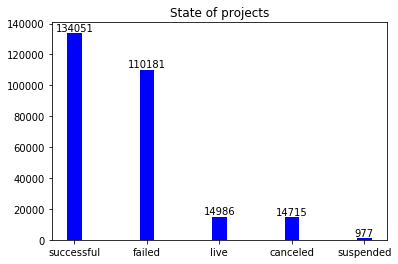

In [11]:
states=df['state'].value_counts()
plt.bar(states.index.tolist(),states, width=0.2, color='blue',align='center' )
plt.title("State of projects")
for a,b in zip(states.index.tolist(), states):
    plt.text(a, b, str(b),ha='center', va='bottom')    
plt.show()

# 2. Conversions:

## Time

Convert time from UNIX to a regular DateTime. drop nan if there's.

[Unix time is the number of seconds that have elapsed since the Unix epoch, that is the time 00:00:00 UTC on 1 January 1970, minus leap seconds.]

In [12]:
import time
df['created_at'] = pd.to_numeric(df['created_at'], errors='coerce')
df['launched_at'] = pd.to_numeric(df['launched_at'], errors='coerce')
df['deadline'] = pd.to_numeric(df['deadline'], errors='coerce')

# remove only if the subset columns are NULL
df = df.dropna(subset=['launched_at','created_at','deadline'])
df['deadline_at'] = df['deadline']
df['deadline'] = df['deadline'].apply(lambda x : time.strftime("%D %H:%M", time.localtime(int(x))))
df['launched'] = df['launched_at'].apply(lambda x : time.strftime("%D %H:%M", time.localtime(int(x))))
#df['launched'] = pd.to_datetime(df['launched_at'],unit='s')
df['created'] = pd.to_datetime(df['created_at'],unit='s')



In [13]:
df[['id','launched','launched_at','deadline','deadline_at']].head(3)

,id,launched,launched_at,deadline,deadline_at
0,2.660535e+08,11/21/18 23:37,1542836237,12/22/18 23:37,1545514637
1,2.115738e+09,12/27/17 13:10,1514373044,01/17/18 13:10,1516187444
2,1.105046e+09,11/11/18 02:33,1541896389,01/10/19 02:33,1547080389


## Goal

Our 'goal' columns are in different currencies. We want to convert it to USD:<br>
'usd_goal_real' = 'goal' * 'static_usd_rate'

Pay attention: the rate is according to Project's launched date

In [14]:
df['goal'] = df['goal'].astype(float)
df['goal'] = df['goal'].astype(int)
df['static_usd_rate'] = df['static_usd_rate'].astype(float)

df['usd_goal_real'] = df['goal'] * df['static_usd_rate']
df['usd_goal_real'] = df['usd_goal_real'].astype(int)

## Main Category and Sub Category

Extract main_category and sub_category from the category JSON:<br>
{"urls":<br>{"web"{"discover":"http://www.kickstarter.com/discover/categories/technology/gadgets"}},<br>"color":6526716,"parent_id":16,<br>"name":"Gadgets","id":337,"position":7,"slug":"technology/gadgets"}

Need to extract 'slug': Main Category = Technology, Sub Category = Gadgets

In [15]:
import json

df['merged_category'] = df['category'].apply(lambda x : json.loads(x)['slug'])
df['main_category'] = df['merged_category'].apply(lambda x : x.split('/')[0])

# in some Categories there were only "main" one -> so sub is as same as main (that's why -1)
df['sub_category'] = df['merged_category'].apply(lambda x : x.split('/')[-1])

# print the number of 'Main_Category==Sub_category' (no '/'in slug -  only main category)
print(df.query('main_category == sub_category').shape[0],"rows with only Main Category.")

23833 rows with only Main Category.


Finally we get:

In [16]:
df.columns

Index(['id', 'name', 'launched_at', 'created_at', 'deadline', 'country',
       'category', 'state', 'goal', 'currency', 'static_usd_rate', 'urls',
       'creator', 'location', 'photo', 'staff_pick', 'blurb', 'deadline_at',
       'launched', 'created', 'usd_goal_real', 'merged_category',
       'main_category', 'sub_category'],
      dtype='object')

# 3. Fine Tuning

## Drop Unnecessary Columns

We have some unnecessary columns, we can drop them.

In [17]:
df = df.drop(['category','merged_category','static_usd_rate'], 1)

## Drop Unnecessary rows

In [18]:
df['state'].unique()

array(['live', 'successful', 'failed', 'canceled', 'suspended'],
      dtype=object)

<b>live</b> - project that still ongoing <br>
<b>canceled</b> - project that was canceled by the creator before due date <br>
<b>suspended</b> - project that was cancled by Kickstarter's Trust & Safety team due to violations of Kickstarter rules <br>
<b>successful</b> - project that was able to raise its crowdfunding goal <br>
<b>failed</b> - project that <b>was not</b> able to raise its crowdfunding goal
<br><br>

We decided to drop live, suspended and canceled projects. 

In [19]:
impute_rows = len(df.query('state == "live"' or 'state == "suspended"' or 'state == "canceled"'))
total_rows = len(df)
print("There were total of",impute_rows, "live, suspended or canceled projects, which are {0:.2f}% of the rows.".format(float((impute_rows/total_rows)*100)))

df = df.query('state != "live"')
df = df.query('state != "suspended"')
df = df.query('state != "canceled"')

There were total of 14986 live, suspended or canceled projects, which are 5.45% of the rows.


## Time - Type conversion

Convert our DateTime columns to DateTime

In [20]:
df['launched_time'] = pd.to_datetime(df['launched'])
df['deadline_time'] = pd.to_datetime(df['deadline'])

df['deadline'] = pd.to_datetime(df['deadline']).dt.normalize()
df['launched'] = pd.to_datetime(df['launched']).dt.normalize()

## Add 'Duration' column

First, we want to add a 'Duration' column = 'deadline' - 'launched'

In [21]:
df['duration'] = pd.to_datetime(df['deadline'], )-pd.to_datetime(df['launched']).dt.normalize()
df['duration'] = df['duration'].dt.days.astype(int)

## Specifying Data Types

In [22]:
binary_variables = ['state','staff_pick']
categorical_variables = ['sub_category', 'main_category', 'country','state']
numeric_variables = ['usd_goal_real','duration']
date_time_variables = ['deadline','launched','deadline_time','launched_time']

## Type Conversion

In [23]:
df[categorical_variables].dtypes

sub_category     object
main_category    object
country          object
state            object
dtype: object

In [24]:
df[numeric_variables].dtypes

usd_goal_real    int32
duration         int32
dtype: object

In [25]:
df[date_time_variables].dtypes

deadline         datetime64[ns]
launched         datetime64[ns]
deadline_time    datetime64[ns]
launched_time    datetime64[ns]
dtype: object

## Categorical and Binary Variables to String

In [26]:
for variable in categorical_variables + binary_variables:
    df[variable] = df[variable].astype(np.str)

## Remove Whitespaces

In [27]:
# Map(func,sequence) -  operates a function on a sequence
# Lambda var1,var2.. : Expression -  Creates an inline function
for variable in categorical_variables:
    df[variable] = df[variable].map(lambda x : x.strip())

## Binarize 'State' label

In [28]:
df['state_original'] = df['state']
df['state'] = df['state'].map(lambda x : '1' if x == 'successful' else '0').astype(int)

## Binarize Staff_pick label

In [29]:
df['staff_pick'].unique()

array(['False', 'True', 'false', 'true'], dtype=object)

In [30]:
df['staff_pick'] = df['staff_pick'].map(lambda x : '1' if ((x == 'true') or (x == 'True')) else '0').astype(int)

# 4. Base Statistics and Distribution

In [31]:
df['state'] = df['state'].astype(int)

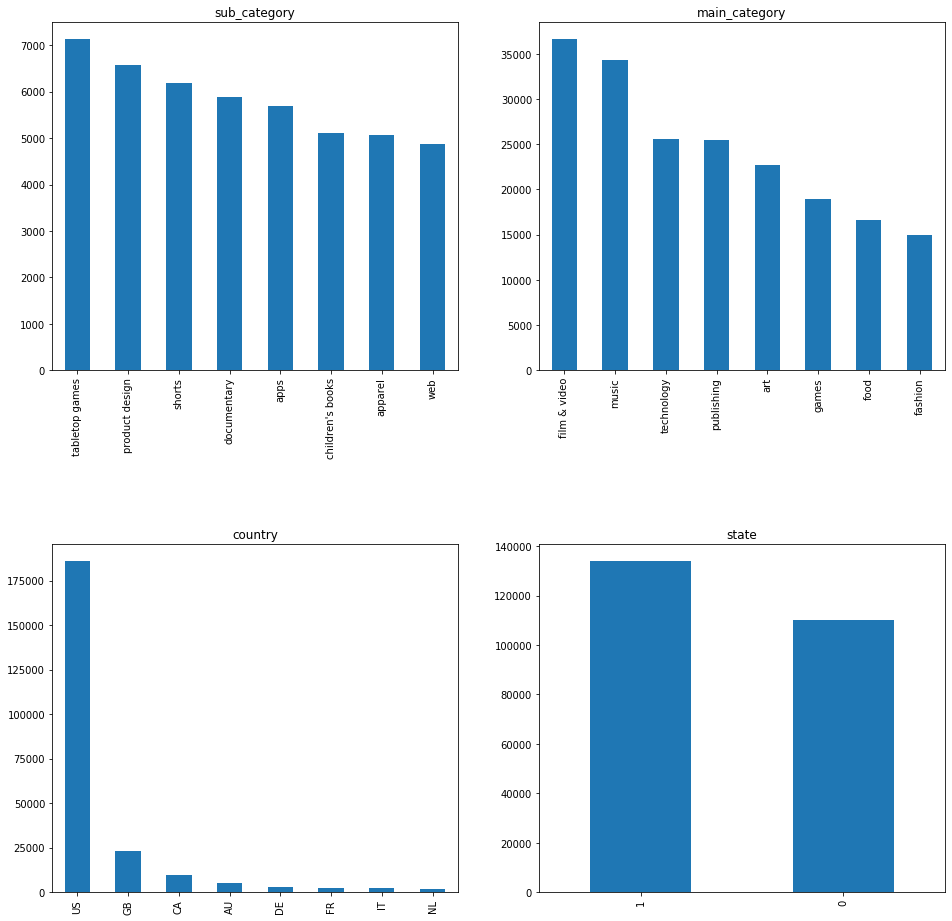

In [32]:
fig, axes = plt.subplots(2,2,figsize=(16,16))
fig.subplots_adjust(hspace=0.5)
i=0
n=len(categorical_variables)
for variable in categorical_variables:
    r=int(i/2)
    c=i%2
    i+=1
    u=min(len(df[variable].unique()),8)
    df[variable].value_counts()[:u].plot(kind='bar',ax=axes[r,c],title=variable)

## Class Distribution

In [33]:
print (df['state'].value_counts())
print (df['state'].value_counts(normalize='True'))

1    134051
0    110181
Name: state, dtype: int64
1    0.548867
0    0.451133
Name: state, dtype: float64


## Duration

The distribution of the duration:

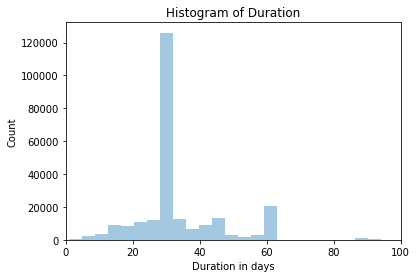

In [34]:
%matplotlib inline
sns.distplot(df['duration'], bins = 25, kde = False).set(xlim=(0, 100))
plt.title('Histogram of Duration')
plt.xlabel('Duration in days')
plt.ylabel('Count')
plt.show()

## Goal

We can see that a histogram of log(Goal) looks way better than "Regular" one (out of scale).<br>
We decided to add a log(Goal) column.

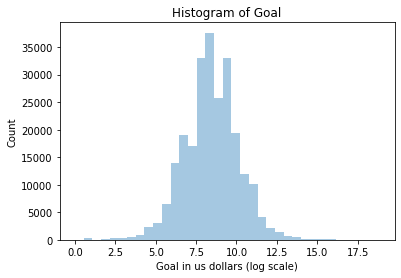

In [35]:
%matplotlib inline
sns.distplot(np.log1p(df['usd_goal_real']), bins = 35, kde = False)
plt.title('Histogram of Goal')
plt.xlabel('Goal in us dollars (log scale)')
plt.ylabel('Count')
plt.show()

In [36]:
df['log_usd_goal'] = np.log10(df.usd_goal_real)
# replace invalid log_usd_goal
df['log_usd_goal'] = df['log_usd_goal'].replace([np.inf, -np.inf, np.nan], 0)

C:\Users\Yotam\AnacondaNew3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Staff Pick
<i>“At Kickstarter HQ, we spend a big part of our day keeping up with projects. Every morning our editorial team opens hundreds of tabs in their browsers and watches all of the project videos that launched in the last 24 hours. When something sticks out as particularly compelling, whether it’s a really fun video, creative and well-priced rewards, a great story, or an exciting idea (ideally all of the above!), we make the project a Staff Pick." </i><br><br>
a Staff Picked project gains more exposure, and will probably succeed.<br>
Important: <b>Up to 24 hours after the launched time</b> the project will be stated as Staff Picked, therefore - we didn't related it as a leakage.

#### Stats

Here we can see the statistics of projects with Staff Pick badge, implying these projects are considered by Kickstarter's staff to be more likely to succeed

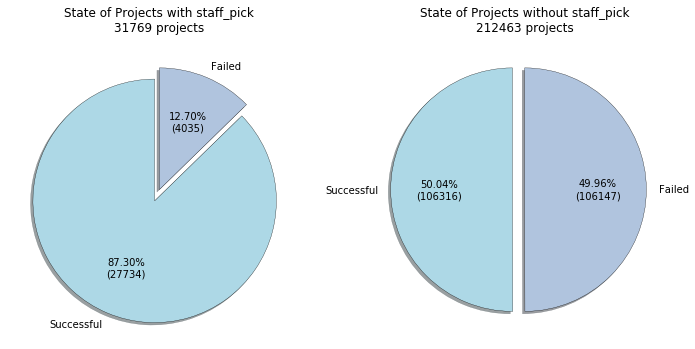

In [37]:
def func(pct, allvals):
    absolute = int(round(pct*sum(allvals)/100.0))
    return "{:.2f}%\n({:d})".format(pct, absolute)

# create a figure with two subplots
fig, axs = plt.subplots(1, 2,figsize=(12,12))
colors=['lightblue','lightsteelblue']
#fig.suptitle("Success and Failed Distribution according to Staff Pick", fontsize="x-large", fontweight="bold")

# plot each pie chart in a separate subplot
d = df[df["staff_pick"] == 1]["state_original"].value_counts()
total = sum(d)
sizes = [round(((x/total)*100),2) for x in d]
labels=d.index.tolist()
labels_with_percent = [labels[i]+" - "+str(sizes[i])+"%" for i in range(2)]
axs[0].pie(sizes, labels=['Successful', 'Failed'], autopct=lambda pct: func(pct, d), shadow=True, startangle=90, colors=colors, wedgeprops={"edgecolor":"0", "linewidth":"0.3"}, explode=(0.1, 0))
axs[0].set_title("State of Projects with staff_pick\n{} projects".format(total))


d = df[(df["staff_pick"] == 0)]["state_original"].value_counts()
total = sum(d)
sizes = [round(((x/total)*100),2) for x in d]
labels=d.index.tolist()
labels_with_percent = [labels[i]+" - "+str(sizes[i])+"%" for i in range(2)]
axs[1].pie(sizes, labels=['Successful', 'Failed'], autopct=lambda pct: func(pct, d), shadow=True, startangle=90, colors=colors, wedgeprops={"edgecolor":"0", "linewidth":"0.3"}, explode=(0.1, 0))
axs[1].set_title("State of Projects without staff_pick\n{} projects".format(total))

plt.show()

### Country as a key to success

#### Influence of country on the success of project

<Figure size 2160x360 with 0 Axes>

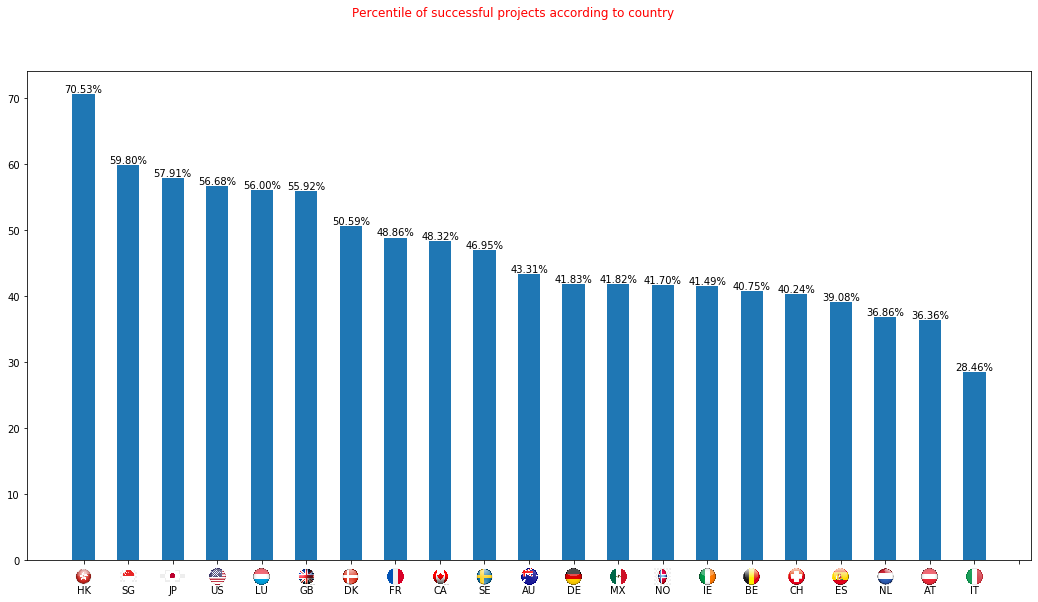

In [38]:
def get_flag(name):
    
    paths = "./flags/{}.png".format(name)
    if path.exists(paths):
        im = plt.imread(paths, 0)
    else : 
        print("no cant find ", paths)
        return

    return im

def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.075)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)

d = df[(df["state"] == 1)]["country"]
successful_countries =d.value_counts()
countries=df['country'].value_counts()
success=np.zeros(len(countries))
sorted_countries = []

for i in range(len(countries)):
    success[i]=successful_countries[countries.index.tolist()[i]] 
percentile = [round((success[i]/countries[i])*100,2) for i in range(22)]
plt.figure(figsize=(30, 5))
percentile.sort(reverse=True)
for i in range(len(countries)):
    for j in range(len(countries)):
        if(round(success[j]/countries[j]*100,2)==percentile[i]):
            sorted_countries.append(countries.index[j])
            break
fig, ax = plt.subplots(figsize=(18,9))
plt.figure(figsize=(30, 5))
plt.bar(sorted_countries, percentile, align='center', width=0.4, color='blue' )
plt.title("Percentile of successful projects according to country", color='red')
plt.ylabel("Percentile of successful projects")
for a,b in zip(sorted_countries, percentile):
    plt.text(a, b, str(round(b,2)),ha='center', va='bottom') 

sorted_countries.pop(8)
percentile.pop(8)
ax.bar(range(21), percentile, width=0.5,align="center")
ax.set_xticks(range(22))
ax.set_xticklabels(sorted_countries)
ax.tick_params(axis='x', which='major', pad=21)
fig.suptitle('Percentile of successful projects according to country', color='red')
for a,b in enumerate(percentile):
    ax.text(a, b, ('%.2f%%' % b),ha='center', va='bottom')


for i in range(1,22):
    offset_image(i-1, str(i), ax)
plt.close()


### Influence of category on the success of project

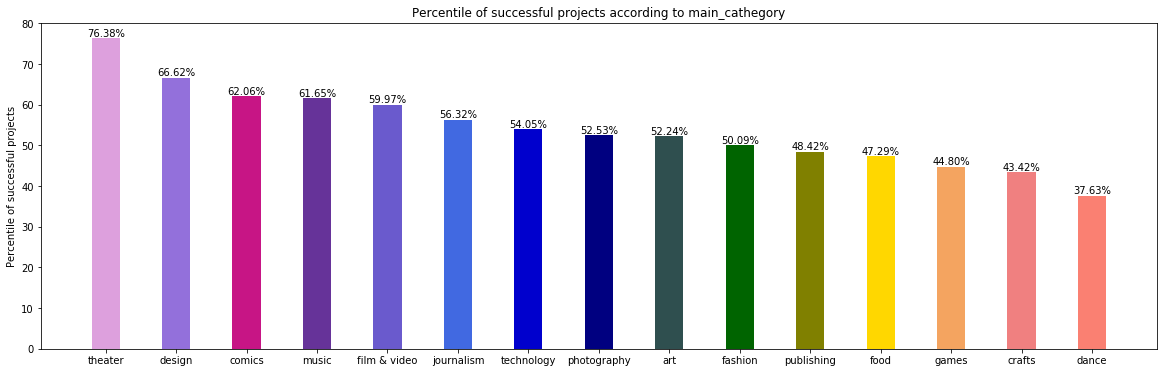

In [39]:
d = df[(df["state"] == 1)]["main_category"]
successful_cat =d.value_counts()

cat=df['main_category'].value_counts()
percentile = [round((successful_cat[i]/cat[i])*100,2) for i in range(len(cat))]
plt.figure(figsize=(20,6))
percentile.sort(reverse=True)
sorted_cat = []
for i in range(len(cat)):
    for j in range(len(cat)):
        if(round(successful_cat[j]/cat[j]*100,2)==percentile[i]):
            sorted_cat.append(cat.index[j])
            break
colors=['plum','mediumpurple', 'mediumvioletred', 'rebeccapurple', 'slateblue','royalblue','mediumblue','navy','darkslategray','darkgreen','olive','gold', 'sandybrown','lightcoral','salmon']
plt.bar(sorted_cat, percentile, align='center', width=0.4, color= colors)
plt.title("Percentile of successful projects according to main_cathegory")
plt.ylabel("Percentile of successful projects")
for a,b in zip(sorted_cat, percentile):
    plt.text(a, b, ('%.2f%%' % b),ha='center', va='bottom') 
plt.show()

### Correlation between goal of the project and its success

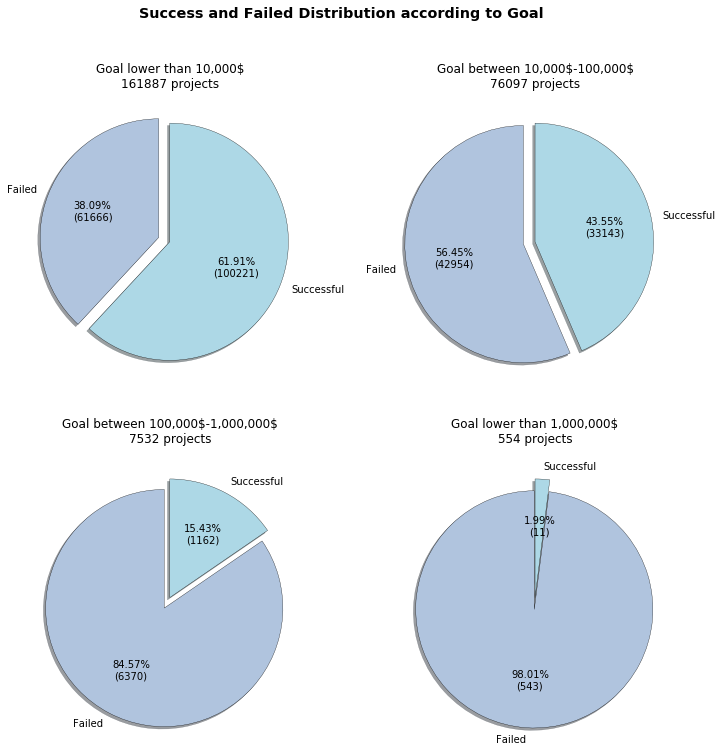

In [40]:
# create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle("Success and Failed Distribution according to Goal", fontsize="x-large", fontweight="bold")
colors=['lightsteelblue','lightblue']

def create_pie(title, data, i,j):
    states= data.value_counts()
    labels=states.index.tolist()
    n=data.count()
    sizes=[(states[i]/n)* 100 for i in range(2)]
    axs[i,j].pie(sizes, labels=['Successful', 'Failed'], autopct=lambda pct: func(pct, states), shadow=True, startangle=90, colors=colors, wedgeprops={"edgecolor":"0", "linewidth":"0.3"}, explode=(0.1, 0))
    axs[i,j].set_title(title.format(sum(states)))


# plot each pie chart in a separate subplot
data = df[(df["usd_goal_real"] < 10000)]["state"]
states= data.value_counts()
labels=states.index.tolist()
n=data.count()
sizes=[(states[i]/n)* 100 for i in range(2)]
axs[0,0].pie(sizes, labels=['Failed','Successful'], autopct=lambda pct: func(pct, states), shadow=True, startangle=90, colors=colors, wedgeprops={"edgecolor":"0", "linewidth":"0.3"}, explode=(0.1, 0))
axs[0,0].set_title("Goal lower than 10,000$\n{} projects".format(sum(states)))
#create_pie("Goal lower than 10,000$\n{} projects",d,0,0)

data= df[(df["usd_goal_real"].between(10000,100000))]["state"]
states= data.value_counts()
labels=states.index.tolist()
n=data.count()
sizes=[(states[i]/n)* 100 for i in range(2)]
axs[0,1].pie(sizes, labels=['Failed','Successful'], autopct=lambda pct: func(pct, states), shadow=True, startangle=90, colors=colors, wedgeprops={"edgecolor":"0", "linewidth":"0.3"}, explode=(0.1, 0))
axs[0,1].set_title("Goal between 10,000\$-100,000\$\n{} projects".format(sum(states)))
#create_pie("Goal between 10,000\$-100,000\$\n{} projects",d,0,1)

data= df[(df["usd_goal_real"].between(100000,1000000))]["state"]
states= data.value_counts()
labels=states.index.tolist()
n=data.count()
sizes=[(states[i]/n)* 100 for i in range(2)]
axs[1,0].pie(sizes, labels=['Failed','Successful'], autopct=lambda pct: func(pct, states), shadow=True, startangle=90, colors=colors, wedgeprops={"edgecolor":"0", "linewidth":"0.3"}, explode=(0.1, 0))
axs[1,0].set_title("Goal between 100,000\$-1,000,000\$\n{} projects".format(sum(states)))
#create_pie("Goal between 100,000\$-1,000,000\$\n{} projects",d,1,0)

data = df[(df["usd_goal_real"] > 1000000)]["state"]
states= data.value_counts()
labels=states.index.tolist()
n=data.count()
sizes=[(states[i]/n)* 100 for i in range(2)]
axs[1,1].pie(sizes, labels=['Failed','Successful'], autopct=lambda pct: func(pct, states), shadow=True, startangle=90, colors=colors, wedgeprops={"edgecolor":"0", "linewidth":"0.3"}, explode=(0.1, 0))
axs[1,1].set_title("Goal lower than 1,000,000$\n{} projects".format(sum(states)))
#create_pie("Goal lower than 1,000,000$\n{} projects",d,1,1)


plt.show()


We can notice that when the goal increases the success rate decreases, therefore we can assume that there is an important correlation between the goal and the success of a project.

### Correlation between duration and success

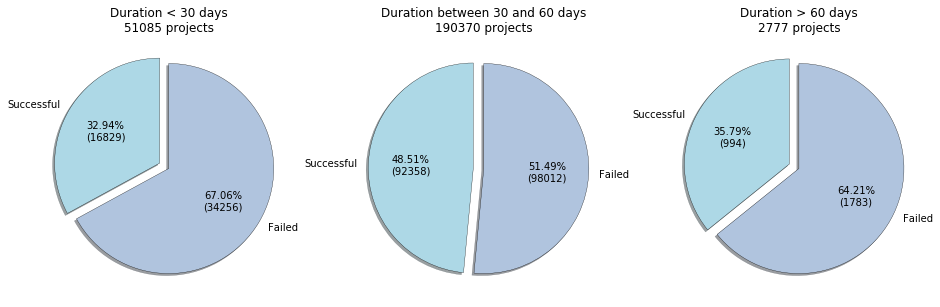

In [41]:
# create a figure with three subplots
fig, axs = plt.subplots(1, 3,figsize=(16,16))
colors=['lightblue','lightsteelblue']

def create_pie(title, data, pie_index):
    states= data.value_counts()
    labels=states.index.tolist()
    n=data.count()
    sizes=[(states[i]/n)* 100 for i in range(2)]
    axs[pie_index].pie(sizes, labels=['Successful', 'Failed'], autopct=lambda pct: func(pct, states), shadow=True, startangle=90, colors=colors, wedgeprops={"edgecolor":"0", "linewidth":"0.3"}, explode=(0.1, 0))
    axs[pie_index].set_title(title.format(sum(states)))


# plot each pie chart in a separate subplot
d = df[(df["duration"] < 30)]["state"]
create_pie("Duration < 30 days\n{} projects",d,0)

d = df[(df["duration"].between(30,60))]["state"]
create_pie("Duration between 30 and 60 days\n{} projects",d,1)

d = df[(df["duration"] > 60)]["state"]
create_pie("Duration > 60 days\n{} projects",d,2)

plt.show()

We can notice that when the duration of a project is between one and two months, the project is more likely to succeed. Almost 50% of thoses projects succeed.

# 5. Run a Baseline Model

## linear SVC

We choose the Linear SVC classifer as base line model.
We choose the following columns for our base line model : 
* usd_goal_real
* duration
* sub_category
* main_category
* country
* state

In [42]:
# load relevant libs
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

# Load the relevant columns to df_model
df_model = df[['usd_goal_real','duration','sub_category','main_category','country','state']].copy()
#df_model = df[['usd_goal_real','duration','main_category','country','state']].copy()
df_model.head(3)

,usd_goal_real,duration,sub_category,main_category,country,state
1,4011,21,plays,theater,GB,1
3,25000,30,food trucks,food,US,0
4,320,21,drama,film & video,US,0


In [43]:
# lets take a look of our model dataset
df_model.describe()

,usd_goal_real,duration,state
count,2.442320e+05,244232.000000,244232.000000
mean,3.546827e+04,33.374910,0.548867
std,9.348289e+05,12.415427,0.497607
min,0.000000e+00,1.000000,0.000000
25%,1.600000e+03,30.000000,0.000000
50%,5.000000e+03,30.000000,1.000000
75%,1.335150e+04,35.000000,1.000000
max,1.523501e+08,98.000000,1.000000


In [44]:
# check our model dataset columns's types
df_model.dtypes

usd_goal_real     int32
duration          int32
sub_category     object
main_category    object
country          object
state             int32
dtype: object

Convert categorical variable of 'sub_category', 'main_category' and 'country' columns into dummy/indicator variables.

In [45]:
# We use one-hot-codding
df_model = pd.get_dummies(df_model, columns = ['sub_category'])
df_model = pd.get_dummies(df_model, columns = ['main_category'])
df_model = pd.get_dummies(df_model, columns=['country'])

# Rename 'main_category_Film & Video' to 'main_category_Film'
df_model.rename(columns={"main_category_Film & Video": "main_category_Film"}, inplace=True)

In [46]:
df_model.columns

Index(['usd_goal_real', 'duration', 'state', 'sub_category_3d printing',
       'sub_category_academic', 'sub_category_accessories',
       'sub_category_action', 'sub_category_animals', 'sub_category_animation',
       'sub_category_anthologies',
       ...
       'country_IT', 'country_JP', 'country_LU', 'country_MX', 'country_NL',
       'country_NO', 'country_NZ', 'country_SE', 'country_SG', 'country_US'],
      dtype='object', length=200)

Prepare our data. Split data into training data and test data.

In [47]:
# y column is our label - i.e the 'state' column
y = df_model['state']
print(y.shape)
df_model = df_model.drop('state', 1)

(244232,)


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df_model,
    y, 
    test_size = 0.1,
    random_state=42
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(219808, 199) (219808,)
(24424, 199) (24424,)


In [49]:
import warnings

linear_svc = LinearSVC()
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    linear_svc.fit(X_train, Y_train)

acc_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)
acc_linear_svc
X_test.head()
ypred = linear_svc.predict(X_test)

## Baseline Model Results
##### Reminder - Precision, Recall and Accuracy, F1 and Confusion Matrix Meanings:
Precision = TP / (TP + FP)<br>
Precision expresses the proportion of the data points our model says was relevant actually were relevant.<br>
<br>
Recall = TP / (TP + FN)<br>
Recall expresses the ability to find all relevant instances in a dataset.<br>
<br>
Accuracy = (TP + TN) / (n) (n is the size of the data) <br>
<br>
F1 Score is a balance between precision and recall (2*Precision*Recall)/(Precision + Recall)<br>
<br>
Confusion Matrix: Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).

In [50]:
from sklearn.metrics import average_precision_score, accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

print("Score train :{0:0.2f}%".format(linear_svc.score(X_train, Y_train)*100))
print("score test:{0:0.2f}%".format(linear_svc.score(X_test, Y_test)*100))

average_precision_round = average_precision_score(Y_test, ypred)
precision, recall, fscore, support= score(Y_test, ypred, average='binary')
print("Precision : {0:0.2f}%".format(precision*100), '\nRecall : {0:0.2f}%'.format(recall*100), '\nfScore : {0:0.2f}%'.format(fscore*100))
print ("accuracy:{0:0.2f}%".format(accuracy_score(Y_test, ypred)*100))
print("confusion matrix: \n", confusion_matrix(Y_test, ypred))
print('Average precision-recall score: {0:0.2f}%'.format( average_precision_round*100))


Score train :63.48%
score test:63.57%
Precision : 60.87% 
Recall : 94.92% 
fScore : 74.17%
accuracy:63.57%
confusion matrix: 
 [[ 2751  8214]
 [  684 12775]]
Average precision-recall score: 60.57%


<br><br>
### As shown in class and described in the presentations and the documentation, we have run a RandomForest model as another baseline Model (with same featues). For convenience, it can be seen in Chapter 11 (MODEL).
<br><br>

# 6. Feature Extraction

Our baseline model and baseline features are not enough. We want to extract more information from our dataset and from outsource datasets.

## Number of projects were launched in the last 7 days

We want to extract the number of projects that were launch on the last 7 days (according to the launch date of the project).
Large number may point that the project did not get enough exposure and may "go down" at the feed.

In [51]:
# Inorder to overcame duplicated row index in dataframe
df = df.reset_index()

We want to count the number of projects launched in last 7 days for each record.

We would like to use the .rolling method (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html).

This method works on a Series - so we will create a series with "launched" column as the index and df.index as the values, then sort the times.

Using a time series as the index allows us to define the rolling window size in terms of hours, days, weeks, etc.

In [52]:
# Create the Series
launched = pd.Series(df.index, index=df.launched, name="count_7_days").sort_index()
launched.head(10)

launched
2009-04-24    194616
2009-04-25     50322
2009-04-28    223483
2009-04-29    122339
2009-04-29     70980
2009-04-29    227885
2009-04-29    174818
2009-04-30     50312
2009-04-30    236166
2009-04-30    213057
Name: count_7_days, dtype: int64

Now we can use .rolling to select time periods as the window. We used launched.rolling('7d') to creates a rolling window that contains all the data in the previous 7 days.

Note: The window contains the current record, so if we want to count all the previous projects but not the current one, we'll need to subtract 1

In [53]:
count_7_days = launched.rolling('7d').count() - 1
print(count_7_days.head(20))

launched
2009-04-24     0.0
2009-04-25     1.0
2009-04-28     2.0
2009-04-29     3.0
2009-04-29     4.0
2009-04-29     5.0
2009-04-29     6.0
2009-04-30     7.0
2009-04-30     8.0
2009-04-30     9.0
2009-04-30    10.0
2009-04-30    11.0
2009-05-01    11.0
2009-05-01    12.0
2009-05-01    13.0
2009-05-01    14.0
2009-05-03    14.0
2009-05-04    15.0
2009-05-04    16.0
2009-05-05    16.0
Name: count_7_days, dtype: float64


Plot the result

Text(0.5, 1.0, 'Competitions in the last 7 days')

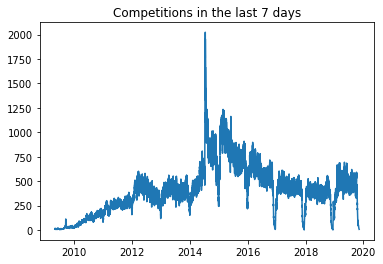

In [54]:
# Ignore records with broken launch dates
plt.plot(count_7_days[7:])
plt.title("Competitions in the last 7 days")

Adjust the index so we can join it with the other training data.

In [55]:
count_7_days.index = launched.values
count_7_days = count_7_days.reindex(df.index)

count_7_days.head(10)

0    166.0
1    374.0
2    383.0
3    542.0
4    448.0
5    296.0
6    418.0
7    436.0
8    444.0
9    429.0
Name: count_7_days, dtype: float64

Finally - add the new column

In [56]:
df['count_7_days'] = count_7_days.astype(int)
df.head(2)

,index,id,name,launched_at,created_at,deadline,country,state,goal,currency,...,created,usd_goal_real,main_category,sub_category,launched_time,deadline_time,duration,state_original,log_usd_goal,count_7_days
0,1,2.115738e+09,The Thing That Came To Dinner,1514373044,1511278710,2018-01-17,GB,1,3000,GBP,...,2017-11-21 15:38:30,4011,theater,plays,2017-12-27 13:10:00,2018-01-17 13:10:00,21,successful,3.603253,166
1,3,8.070321e+07,"In Pizza We Crust, Wood Fired Pizza Food Truck",1522169423,1506730566,2018-04-26,US,0,25000,USD,...,2017-09-30 00:16:06,25000,food,food trucks,2018-03-27 18:50:00,2018-04-26 19:50:00,30,failed,4.397940,374


## Number of projects were launched in the last 7 days in the same category

We want to add the same feature as above, just for each category.

In [57]:
# A function that calculates the number of projects in the last 7 days
def count_7_days_ca(df):
    launched = pd.Series(df.index, index=df.launched, name="category_count_7_days").sort_index()
    category_count_7_days = launched.rolling('7d').count() - 1
    category_count_7_days.index = launched.values
    category_count_7_days = category_count_7_days.reindex(df.index)
    return category_count_7_days.astype(int)

For each category we created a new dataset from the original dataset and for which we calculated the number of projects launched in the last 7 days. Finally, we concatenated all datasets.

In [58]:
s1 = pd.DataFrame()
categories = df['main_category'].unique()
print(categories)

['theater' 'food' 'film & video' 'fashion' 'technology' 'games'
 'publishing' 'art' 'design' 'music' 'crafts' 'comics' 'photography'
 'dance' 'journalism']


In [59]:
df_technology = df.loc[df['main_category'] == 'technology'].copy()
df_technology['category_count_7_days'] = count_7_days_ca(df_technology)

df_publishing = df.loc[df['main_category'] == 'publishing'].copy()
df_publishing['category_count_7_days'] = count_7_days_ca(df_publishing)

df_music = df.loc[df['main_category'] == 'music'].copy()
df_music['category_count_7_days'] = count_7_days_ca(df_music)

df_games = df.loc[df['main_category'] == 'games'].copy()
df_games['category_count_7_days'] = count_7_days_ca(df_games)

df_film = df.loc[df['main_category'] == 'film & video'].copy()
df_film['category_count_7_days'] = count_7_days_ca(df_film)

df_art = df.loc[df['main_category'] == 'art'].copy()
df_art['category_count_7_days'] = count_7_days_ca(df_art)

df_theater = df.loc[df['main_category'] == 'theater'].copy()
df_theater['category_count_7_days'] = count_7_days_ca(df_theater)

df_photography = df.loc[df['main_category'] == 'photography'].copy()
df_photography['category_count_7_days'] = count_7_days_ca(df_photography)

df_journalism = df.loc[df['main_category'] == 'journalism'].copy()
df_journalism['category_count_7_days'] = count_7_days_ca(df_journalism)

df_food = df.loc[df['main_category'] == 'food'].copy()
df_food['category_count_7_days'] = count_7_days_ca(df_food)

df_fashion = df.loc[df['main_category'] == 'fashion'].copy()
df_fashion['category_count_7_days'] = count_7_days_ca(df_fashion)

df_design = df.loc[df['main_category'] == 'design'].copy()
df_design['category_count_7_days'] = count_7_days_ca(df_design)

df_dance = df.loc[df['main_category'] == 'dance'].copy()
df_dance['category_count_7_days'] = count_7_days_ca(df_dance)

df_comics = df.loc[df['main_category'] == 'comics'].copy()
df_comics['category_count_7_days'] = count_7_days_ca(df_comics)

df_crafts = df.loc[df['main_category'] == 'crafts'].copy()
df_crafts['category_count_7_days'] = count_7_days_ca(df_crafts)

In [60]:
result = pd.concat([df_technology, df_publishing])
result1 = pd.concat([df_music,df_film])
result2 = pd.concat([df_art,df_theater])
result3 = pd.concat([df_photography,df_journalism])
result4 = pd.concat([df_food,df_fashion])
result5 = pd.concat([df_design,df_dance])
result6 = pd.concat([df_comics,df_crafts])
result7 = pd.concat([result,df_games])

r = pd.concat([result1,result2])
r1 = pd.concat([result3,result4])
r2 = pd.concat([result5,result6])

a = pd.concat([result7,r])
b = pd.concat([r1,r2])

final = pd.concat([a,b])
df = final
df.head(5)

,index,id,name,launched_at,created_at,deadline,country,state,goal,currency,...,usd_goal_real,main_category,sub_category,launched_time,deadline_time,duration,state_original,log_usd_goal,count_7_days,category_count_7_days
7,9,1.039671e+09,3-D PRINTER USING RECYCLED PLASTICS,1540576199,1540329944,2018-11-25,US,1,700,USD,...,700,technology,3d printing,2018-10-26 20:49:00,2018-11-25 04:46:00,30,successful,2.845098,436,58
21,30,7.554715e+08,The Epilepsy Journal App - iOS version,1534429074,1534411519,2018-10-15,CA,1,5000,CAD,...,3824,technology,apps,2018-08-16 17:17:00,2018-10-15 17:17:00,60,successful,3.582518,318,34
31,43,5.969670e+06,5V to 900V step-up converter module,1535472924,1535142709,2018-09-27,IT,1,625,EUR,...,726,technology,diy electronics,2018-08-28 19:15:00,2018-09-27 19:15:00,30,successful,2.860937,311,50
36,49,1.050488e+09,Cabot - a smart percussion robot for solo musi...,1524715335,1512556516,2018-05-31,JP,0,4600000,JPY,...,42195,technology,sound,2018-04-26 07:02:00,2018-05-31 17:59:00,35,failed,4.625261,346,78
47,60,3.169271e+08,XLR8 Perfect Skill System,1518576732,1518413267,2018-02-24,CA,1,1000,CAD,...,796,technology,apps,2018-02-14 04:52:00,2018-02-24 08:00:00,10,successful,2.900913,369,45


## Time (in hours) since the last project in the same category

Again, if there are two projects in the same catergoty that were launched in low time difference it may point lack of exposure.

In [61]:
def time_since_last_project(series):
    # Return the time in hours
    return series.diff().dt.total_seconds() / 3600.

a = df[['main_category', 'launched_time']].sort_values('launched_time')
time_deltas = a.groupby('main_category').transform(time_since_last_project)
time_deltas = time_deltas.fillna(time_deltas.median()).reindex(df.index)
time_deltas.head(10)

,launched_time
7,0.800000
21,0.050000
31,0.033333
36,0.116667
47,1.250000
55,1.050000
65,0.116667
73,1.716667
75,2.250000
77,0.633333


In [62]:
df['time_deltas'] = time_deltas
df.head(2)

,index,id,name,launched_at,created_at,deadline,country,state,goal,currency,...,main_category,sub_category,launched_time,deadline_time,duration,state_original,log_usd_goal,count_7_days,category_count_7_days,time_deltas
7,9,1.039671e+09,3-D PRINTER USING RECYCLED PLASTICS,1540576199,1540329944,2018-11-25,US,1,700,USD,...,technology,3d printing,2018-10-26 20:49:00,2018-11-25 04:46:00,30,successful,2.845098,436,58,0.80
21,30,7.554715e+08,The Epilepsy Journal App - iOS version,1534429074,1534411519,2018-10-15,CA,1,5000,CAD,...,technology,apps,2018-08-16 17:17:00,2018-10-15 17:17:00,60,successful,3.582518,318,34,0.05


# Number of projects per creator

We might see that a creator with expierence, meaning he's already had a kickstarter project may point that his futured projects have higher success rate.
We want to extract the number of projects per creator_id and analyze it.

We added two more columns to our datasets, 'Creator_ID', exctracted from 'Creator' attribue, and 'Num_projects', which implies how many projects are related to the specific creator_id. later we found strong correlation between number of projects per creator to his or hers success rate.

In [63]:
id_dict = dict()
id_list = []
num_of_projects_list = []
sub_df = df[['id','state','creator']]
creators = list(df['creator'])
for i in range(len(creators)):
    try:
        creator_id = json.loads(creators[i])
        creator_id = creator_id['id']
        id_list.append(creator_id)
    except:
        index_0 = creators[i].find(':')
        index_1 = creators[i].find(',')
        creator_id = creators[i][index_0+1:index_1]
        id_list.append(creator_id)
    if creator_id in id_dict:
        id_dict[creator_id]+=1
    else:
        id_dict[creator_id] = 1
for i in range(len(id_list)):
    num_of_projects_list.append(id_dict[id_list[i]])
df.insert(2, "Creator_ID", id_list) # OS COMMENT IF ALREADY EXISTS
df.insert(3, "Num_projects", num_of_projects_list) # OS COMMENT IF ALREADY EXISTS
df.head(5)


,index,id,Creator_ID,Num_projects,name,launched_at,created_at,deadline,country,state,...,main_category,sub_category,launched_time,deadline_time,duration,state_original,log_usd_goal,count_7_days,category_count_7_days,time_deltas
7,9,1.039671e+09,666365030,1,3-D PRINTER USING RECYCLED PLASTICS,1540576199,1540329944,2018-11-25,US,1,...,technology,3d printing,2018-10-26 20:49:00,2018-11-25 04:46:00,30,successful,2.845098,436,58,0.800000
21,30,7.554715e+08,1074989573,1,The Epilepsy Journal App - iOS version,1534429074,1534411519,2018-10-15,CA,1,...,technology,apps,2018-08-16 17:17:00,2018-10-15 17:17:00,60,successful,3.582518,318,34,0.050000
31,43,5.969670e+06,1767748553,2,5V to 900V step-up converter module,1535472924,1535142709,2018-09-27,IT,1,...,technology,diy electronics,2018-08-28 19:15:00,2018-09-27 19:15:00,30,successful,2.860937,311,50,0.033333
36,49,1.050488e+09,291424847,1,Cabot - a smart percussion robot for solo musi...,1524715335,1512556516,2018-05-31,JP,0,...,technology,sound,2018-04-26 07:02:00,2018-05-31 17:59:00,35,failed,4.625261,346,78,0.116667
47,60,3.169271e+08,62418954,1,XLR8 Perfect Skill System,1518576732,1518413267,2018-02-24,CA,1,...,technology,apps,2018-02-14 04:52:00,2018-02-24 08:00:00,10,successful,2.900913,369,45,1.250000


## Creators with two or more projects

Here are statistics of projects divide by creator's number of launched projects (exactly one, or two and more)

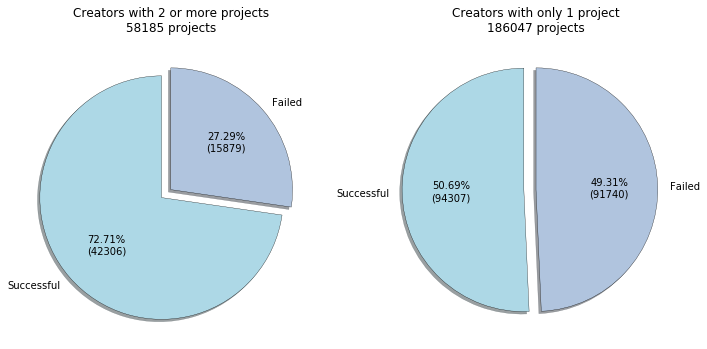

In [64]:
# create a figure with two subplots
fig, axs = plt.subplots(1, 2,figsize=(12,12))
colors=['lightblue','lightsteelblue']
#fig.suptitle("Success and Failed Distribution according to Creator's number of launched projects", fontsize="x-large", fontweight="bold")

def create_pie(title, data, i):
    total = sum(data)
    sizes = [round(((x/total)*100),2) for x in d]
    labels=d.index.tolist()
    #labels_with_percent = [labels[i]+" - "+str(sizes[i])+"%" for i in range(2)]
    axs[i].pie(sizes, labels=['Successful', 'Failed'], autopct=lambda pct: func(pct, data), shadow=True, startangle=90, colors=colors, wedgeprops={"edgecolor":"0", "linewidth":"0.3"}, explode=(0.1, 0))
    axs[i].set_title(title.format(total))


# plot each pie chart in a separate subplot
d = df[(df["Num_projects"] > 1)]["state_original"].value_counts()
create_pie("Creators with 2 or more projects\n{} projects",d,0)

d = df[(df["Num_projects"] == 1)]["state_original"].value_counts()
create_pie("Creators with only 1 project\n{} projects",d,1)

plt.show()

It's easy to see that creators with at least 2 projects are willing to create a successful project.

## #Capital_letters in the project's name

Let's count the number of capital letters in the project's name

In [65]:
df['num_capital_letters'] = df['name'].apply(lambda x: (sum(1 for c in x if c.isupper()))).astype(int)
df[['name','num_capital_letters']].nlargest(10, 'num_capital_letters')

,name,num_capital_letters
70111,WRITING A BOOK TO CELEBRATE AND PRESERVE AMER...,71
231339,ALS:ALWAYS LOOKING SEXY. A PLAYFUL CALENDAR TH...,68
225984,KEVIN EARNEST HAS A RECORD TO MAKE AND YOUR CO...,68
102326,"RELEASE YOUNG HUSTLUH'S DEBUT ALBUM FT. E-40, ...",65
102724,FUND DUSSEL HAS FRIENDS RECORDING THEIR SONGS ...,62
102952,THE KAL MARSHELL PROJECT A NEW ARTIST A N...,62
96695,THOMAS WATKISS WELCOMES FUNDING FOR THE COMPLE...,60
153786,(Un)spoiled - SUPPORT A DOCUMENTARY FILM ON TH...,59
169592,FOURDORA AAAAAAAAAAAAAAAHHHHHHHHHHHHHHHHHHHHHH...,59
225492,HELP START UP NFJM 030: A BENEFIT LP fea. NO A...,57


 ## #special_chars in the project's name

Let's count the number of special chars in the project's name

In [66]:
special_chars = ['?','!','@','#','$','%','^','&','*']
df['num_special_chars'] = df['name'].apply(lambda x: (sum(1 for c in x if c in special_chars))).astype(int)
df[['name','num_special_chars']].nlargest(10, 'num_special_chars')

,name,num_special_chars
98472,The Blue Party!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,54
48656,IF YOU ARE UNEMPLOYED HOW WILL YOU FIND A JOB ...,14
214769,i will make you laugh!!!!!!!!!!!!!,13
94724,The First PUNCH!!!!!! Recording of the 1st M.P...,12
207580,****** LACE- N- LIGHTS ******,12
105880,money to record album!!!!!!!!!!!,11
108937,To enable Causilla to record full album plus t...,11
144216,New Math the Band Music Video !!!!!!!!!!,10
192373,The Mysterious Package Company Presents: The C...,10
193921,"THE HAND CAN!!!!!!!!!! , ""Mike Pierre, Last Am...",10


## Some DateTime info

In [67]:
# launched year (most of the time == deadline year)
df['launch_year'] = pd.DatetimeIndex(df.launched).year

# launched and deadline month
df['launch_month'] = pd.DatetimeIndex(df.launched).month
df['deadline_month'] = pd.DatetimeIndex(df.deadline).month

# launched and deadline day
df['launch_day']= pd.DatetimeIndex(df.launched).day
df['deadline_day']= pd.DatetimeIndex(df.deadline).day

# launched WeekDay
df['launched_dayweek']= df['launched'].dt.dayofweek

### Top and Bottom Categories

We divided the dataset into two: USA and out-of-USA countries.
In each category we marked each row as if it's in the bottom categories or top categories

Add a boolean column inUSA

In [68]:
df['inUSA'] = df['country'].map(lambda x : '1' if x == 'US' else '0').astype(int)

Add column top/bottom categories in USA

In [69]:
import operator
ranking_USA = df.query('inUSA==1 & state==1 ')['main_category'].value_counts()
cat_USA = df.query("inUSA == 1")['main_category'].value_counts()
l =[]
for cat in df.main_category.unique():
    l.append
    l.append((cat, ranking_USA[cat]/cat_USA[cat]))
l.sort(key = operator.itemgetter(1))
print(l)

[('journalism', 0.27886056971514245), ('technology', 0.306480920654149), ('food', 0.40189801913082773), ('crafts', 0.43240248226950356), ('fashion', 0.5085764984227129), ('art', 0.5263848479662274), ('publishing', 0.5386973937985263), ('photography', 0.564677123650438), ('film & video', 0.6085791805474465), ('music', 0.6282107685539273), ('games', 0.6749214424659584), ('theater', 0.7865356083086054), ('comics', 0.7976494634644865), ('design', 0.7977557411273486), ('dance', 0.8167272727272727)]


In [70]:
top_cat = ['comics', 'theater', 'design', 'dance']
bottom_cat = ['journalism', 'technology', 'food']
df['top_cat_inUSA']= df['main_category'].map(lambda x :'1' if x in top_cat else '0').astype(int)
df['bottom_cat_inUSA']= df['main_category'].map(lambda x :'1' if x in bottom_cat else '0').astype(int)

Add column top / bottom categories outside USA

In [71]:
import operator
ranking_out = df.query('inUSA==0 & state==1 ')['main_category'].value_counts()
cat_out = df.query("inUSA == 0")['main_category'].value_counts()
l =[]
for cat in df.main_category.unique():
    l.append
    l.append((cat, ranking_out[cat]/cat_out[cat]))
l.sort(key = operator.itemgetter(1))
print(l)

[('technology', 0.23542451784526713), ('journalism', 0.2422680412371134), ('food', 0.2545454545454545), ('crafts', 0.4395186827105763), ('photography', 0.43976970770593443), ('fashion', 0.4847408026755853), ('art', 0.5091848450057406), ('music', 0.5435886584849767), ('publishing', 0.5491973559962229), ('film & video', 0.5654081361340069), ('games', 0.5926386913229018), ('dance', 0.6114649681528662), ('theater', 0.6971677559912854), ('comics', 0.7554727526781556), ('design', 0.7673076923076924)]


In [72]:
top_cat = ['comics', 'theater', 'design', 'dance']
bottom_cat = ['journalism', 'technology', 'food']
df['top_cat_out']= df['main_category'].map(lambda x :'1' if x in top_cat else '0').astype(int)
df['bottom_cat_out']= df['main_category'].map(lambda x :'1' if x in bottom_cat else '0').astype(int)

# Point of Focus and nontrivial features extraction

# 8. Rewards 

## Extract Rewards Information

*  From kickstarter web : https://www.kickstarter.com/help/handbook/rewards

<i>"Like it or not, almost no one does something for nothing. A very small percentage of Kickstarter backers will support a campaign without expecting anything in return, but not most. Thankfully, Kickstarter lets the creator to create a series of rewards to say “thank you” to those who back their project and want to see them succeed." [https://www.dummies.com/business/fundraising/kickstarter/how-to-reward-your-kickstarter-projects-backers/]</i>

Therefore, we believe that it can significantly affect the failure or success of the project.

In our dataset there was no explicit column of Rewards. There was a column containing the project's rewards URL.

In order to extract the data, we built a crawler. We added delay between every extraction in order to prevent a ban.
We saved the information in an outsource CSV, called 'rewards.csv'. Here is a part of our crawler, as draft code.

a function to calculate the sum of project rewards

## Rewards / Feature Extraction:
After getting the information by the crawler, we decided to extract the following features:
- min reward price / goal
- max reward price / goal
- avg reward price / goal
- num of reward options

To speedup the notebook, we offloaded the process and brought a "finished" csv

Importing the data:

In [73]:
reward_df = pd.read_csv("rewards.csv")
reward_df.head(5)
reward_df.shape

df = pd.merge(reward_df, df, on='id')
df.shape

(243113, 49)

Normalize by the goal:

In [74]:
df['min_reward_price'] = (df['min_reward_price'] / df['usd_goal_real']) * 100
df['max_reward_price'] = (df['max_reward_price'] / df['usd_goal_real']) * 100
df['avg_reward_price'] = (df['avg_reward_price'] / df['usd_goal_real']) * 100
df.head(5)

,id,min_reward_price,max_reward_price,avg_reward_price,num_of_reward_options,index,Creator_ID,Num_projects,name,launched_at,...,launch_month,deadline_month,launch_day,deadline_day,launched_dayweek,inUSA,top_cat_inUSA,bottom_cat_inUSA,top_cat_out,bottom_cat_out
0,1.610438e+09,0.200000,4.000000,1.540000,5,1,1029590798,1,NET Show (Next Entrepreneur Trade Show),1437450938,...,7,9,21,19,1,1,0,1,0,1
1,2.127141e+09,0.007000,9.999000,0.977091,11,2,1554074090,1,Pure.Charger,1466084518,...,6,7,16,16,3,1,0,1,0,1
2,1.353155e+09,0.500000,2.500000,1.500000,2,3,892489289,1,LiteStem,1459779677,...,4,5,4,4,0,1,0,1,0,1
3,2.969102e+08,0.040800,20.300752,3.289037,10,4,1398586789,1,HighTech Advisor,1416983071,...,11,12,26,26,2,0,0,1,0,1
4,2.009359e+09,0.004654,15.273997,2.267431,7,5,2105876114,1,Safety Beacon - The world's smartest road safe...,1457865064,...,3,4,13,12,6,0,0,1,0,1


In [75]:
df['min_reward_price'] = df['min_reward_price'].replace([np.inf, -np.inf, np.nan], 0)
df['max_reward_price'] = df['max_reward_price'].replace([np.inf, -np.inf, np.nan], 0)
df['avg_reward_price'] = df['avg_reward_price'].replace([np.inf, -np.inf, np.nan], 0)
df['num_of_reward_options'] = df['num_of_reward_options'].replace([np.inf, -np.inf, np.nan], 0)

## Rewards Features Statistics

##### Num of reward options

In [76]:
successful_option = []
r_options = df['num_of_reward_options'].unique()
options = []
for o in r_options:
    d = df.loc[df['num_of_reward_options'] == o].copy()
    if(d.shape[0] > 100):
        successful_option.append( d.loc[d['state'] == 1].shape[0] / d.shape[0])
        options.append(o)

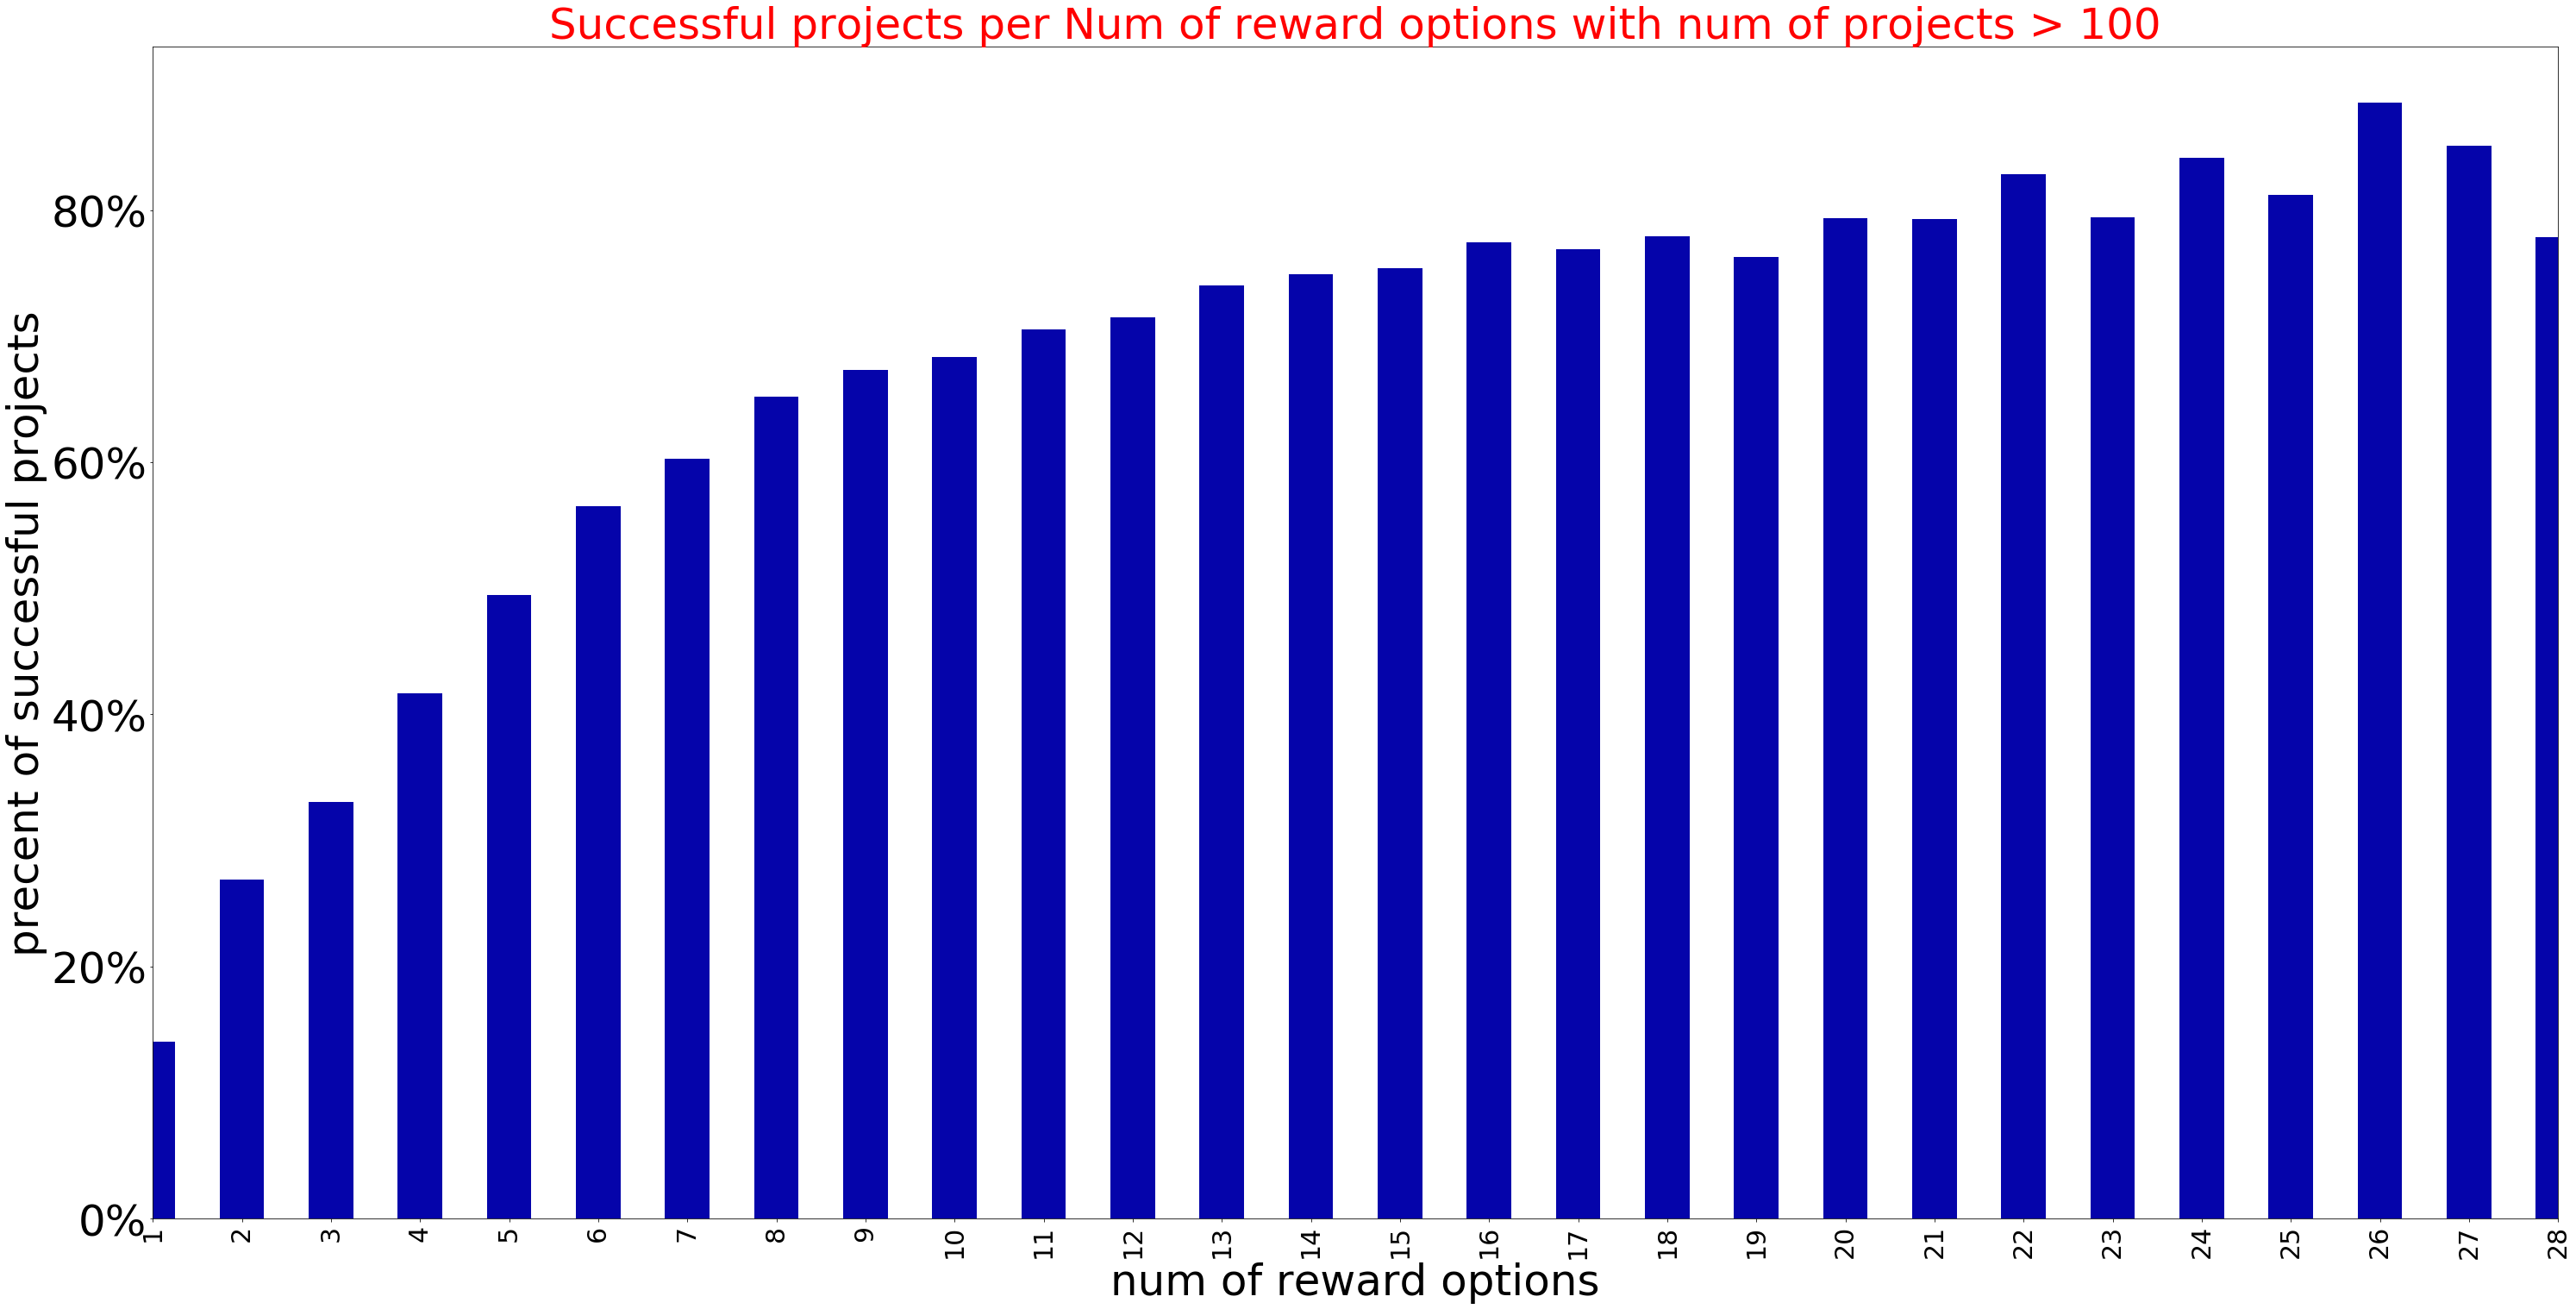

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(50,25))
plt.bar(options, successful_option, width = 0.5, color='#0504aa')
plt.xlim(min(options), max(options))
plt.xticks(options,rotation='vertical',fontsize=30)
plt.yticks(fontsize=50)
plt.title("Successful projects per Num of reward options with num of projects > 100", color='red', fontsize=50)
plt.ylabel("precent of successful projects",fontsize=50)
plt.xlabel("num of reward options",fontsize=50)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

# 8. Integrate with outsource DataSets

Note :
Both integrations with external DataSets are related to 'country' column.
The 'country' column contains encoded countries names. So, we used a 'country_converter' from https://github.com/konstantinstadler/country_converter.

In [78]:
### a country converter ###
# In case you need to install the package:
# conda install -c konstantinstadler country_converter
import country_converter as coco 

## Country's GDP
Gross domestic product (GDP) is a monetary measure of the market value of all the final goods and services produced in a specific time period.

We wanted to add a 'GDP' column because we assumed that the higher the 'GDP' in the country where the project was launched, the project has a greater chance of succeeding.

We used a dataset from https://www.kaggle.com/stieranka/predicting-gdp-world-countries .
This dataset contains several columns (see URL) and we focused on 'County' and 'GDP ($ per capita)' columns.

In [79]:
countries_list = list(pd.unique(df.country))

countries_names_dict = {}
i=0
for country in countries_list:
    l = [country]
    country_converted_name = coco.convert(names=l,to='name_short')
    countries_names_dict[country] = country_converted_name

countries_GDP = pd.read_csv("ks_countries_gdp.csv")
countries_GDP_dict = pd.Series(countries_GDP['GDP ($ per capita)'].values,countries_GDP.Country).to_dict()

original_name_countries_GDP_dict = {}
for country in countries_names_dict:
    original_name_countries_GDP_dict[str(country)] = countries_GDP_dict[countries_names_dict[country] + ' ']

Let's add the column.

In [80]:
df = df.assign(country_GDP = lambda x: x['country'])
df.replace({'country_GDP': original_name_countries_GDP_dict}, inplace=True)
df.head(5)

,id,min_reward_price,max_reward_price,avg_reward_price,num_of_reward_options,index,Creator_ID,Num_projects,name,launched_at,...,deadline_month,launch_day,deadline_day,launched_dayweek,inUSA,top_cat_inUSA,bottom_cat_inUSA,top_cat_out,bottom_cat_out,country_GDP
0,1.610438e+09,0.200000,4.000000,1.540000,5,1,1029590798,1,NET Show (Next Entrepreneur Trade Show),1437450938,...,9,21,19,1,1,0,1,0,1,37800.0
1,2.127141e+09,0.007000,9.999000,0.977091,11,2,1554074090,1,Pure.Charger,1466084518,...,7,16,16,3,1,0,1,0,1,37800.0
2,1.353155e+09,0.500000,2.500000,1.500000,2,3,892489289,1,LiteStem,1459779677,...,5,4,4,0,1,0,1,0,1,37800.0
3,2.969102e+08,0.040800,20.300752,3.289037,10,4,1398586789,1,HighTech Advisor,1416983071,...,12,26,26,2,0,0,1,0,1,29000.0
4,2.009359e+09,0.004654,15.273997,2.267431,7,5,2105876114,1,Safety Beacon - The world's smartest road safe...,1457865064,...,4,13,12,6,0,0,1,0,1,27700.0


## Happiness
The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

We wanted to add a 'Happiness' column because we assumed that the higher the 'Happiness' in the country where the project was launched, the project has a greater chance of succeeding.

We used 5 datasets from https://www.kaggle.com/unsdsn/world-happiness .
This datasets contains several columns (see URL) and we focused on 'County' and 'Happiness Score' columns.
Every dataset is related to Year (2015-2019).
Therefore, we added to each country the 'Happiness Score' according to the year the project was launched.

In [81]:
countries_happiness_2015 = pd.read_csv("./world_happiness/2015.csv")
countries_happiness_2015_dict = pd.Series(countries_happiness_2015['Happiness Score'].values,countries_happiness_2015.Country).to_dict()
countries_happiness_2016 = pd.read_csv("./world_happiness/2016.csv")
countries_happiness_2016_dict = pd.Series(countries_happiness_2016['Happiness Score'].values,countries_happiness_2016.Country).to_dict()
countries_happiness_2017 = pd.read_csv("./world_happiness/2017.csv")
countries_happiness_2017_dict = pd.Series(countries_happiness_2017['Happiness.Score'].values,countries_happiness_2017.Country).to_dict()
countries_happiness_2018 = pd.read_csv("./world_happiness/2018.csv")
countries_happiness_2018_dict = pd.Series(countries_happiness_2018['Score'].values,countries_happiness_2018['Country or region']).to_dict()
countries_happiness_2019 = pd.read_csv("./world_happiness/2019.csv")
countries_happiness_2019_dict = pd.Series(countries_happiness_2019['Score'].values,countries_happiness_2019['Country or region']).to_dict()


In [82]:
df = df.assign(country_happiness = lambda x: x['country'])

for country in countries_names_dict:
    df['country_happiness'] = np.where((df.country_happiness == country) & (df['launched'].dt.year <= 2015),countries_happiness_2015_dict[countries_names_dict[country]],df.country_happiness)
    df['country_happiness'] = np.where((df.country_happiness == country) & (df['launched'].dt.year == 2016),countries_happiness_2016_dict[countries_names_dict[country]],df.country_happiness)
    df['country_happiness'] = np.where((df.country_happiness == country) & (df['launched'].dt.year == 2017),countries_happiness_2017_dict[countries_names_dict[country]],df.country_happiness)
    df['country_happiness'] = np.where((df.country_happiness == country) & (df['launched'].dt.year == 2018),countries_happiness_2018_dict[countries_names_dict[country]],df.country_happiness)
    df['country_happiness'] = np.where((df.country_happiness == country) & (df['launched'].dt.year == 2019),countries_happiness_2019_dict[countries_names_dict[country]],df.country_happiness)

df[['country_happiness']] = df['country_happiness'].astype(float)    
df.head(5)

,id,min_reward_price,max_reward_price,avg_reward_price,num_of_reward_options,index,Creator_ID,Num_projects,name,launched_at,...,launch_day,deadline_day,launched_dayweek,inUSA,top_cat_inUSA,bottom_cat_inUSA,top_cat_out,bottom_cat_out,country_GDP,country_happiness
0,1.610438e+09,0.200000,4.000000,1.540000,5,1,1029590798,1,NET Show (Next Entrepreneur Trade Show),1437450938,...,21,19,1,1,0,1,0,1,37800.0,7.119
1,2.127141e+09,0.007000,9.999000,0.977091,11,2,1554074090,1,Pure.Charger,1466084518,...,16,16,3,1,0,1,0,1,37800.0,7.104
2,1.353155e+09,0.500000,2.500000,1.500000,2,3,892489289,1,LiteStem,1459779677,...,4,4,0,1,0,1,0,1,37800.0,7.104
3,2.969102e+08,0.040800,20.300752,3.289037,10,4,1398586789,1,HighTech Advisor,1416983071,...,26,26,2,0,0,1,0,1,29000.0,7.284
4,2.009359e+09,0.004654,15.273997,2.267431,7,5,2105876114,1,Safety Beacon - The world's smartest road safe...,1457865064,...,13,12,6,0,0,1,0,1,27700.0,6.725


# 9. NLP and statistics analyzing over 'Name' and 'Blurb'
<br>

## Project's Name

We want to analyze and check if the name of the project has influence on the success rate.

### Char Count

Let's examine name's char count:

In [83]:
df['char_count_name'] = df['name'].str.len() # this also includes spaces
df[['name','char_count_name']].nlargest(10, 'char_count_name')

,name,char_count_name
746,Sustainable Theatre Project and The Life-Cycle...,85
21160,Launch the webstream for the Chicago Independe...,85
25602,The B-girl Guide:In the Context of Now (Living...,85
25803,"PURPLE HAZE ""An UN-alien's Guide to finding OU...",85
27126,WRITING A BOOK TO CELEBRATE AND PRESERVE AMER...,85
27245,Metal Missionaries- The Assimilation Of Extrem...,85
27525,A Dove From Dalian: The history of Christian f...,85
34917,Let's print a book and donate hundreds of copi...,85
34938,Blaire Sees Bears --Think: I-Spy meets Dr. Sue...,85
42594,Weathervane- Ltd hand screened Poster: Sharon ...,85


### Number of words

Let's examine the number of words in the name:

In [84]:
df['word_count_name'] = df['name'].apply(lambda x: len(str(x).split(" ")))
df.head()
df[['name','word_count_name']].nlargest(10, 'word_count_name')

,name,word_count_name
87355,food truck ambrosia...,32
56757,T H E W H I S K E Y P R I E S T' S M E A N S ...,28
168450,Under the Western Sun - The Ret...,28
2759,A Kingdom for a Stage! - Much Ado...,23
3300,Castaway of the Earth / Le Naufra...,23
2364,BELIEVE/ The Musical Give Good D...,22
18723,A N Y T I M E T V® Free Apps Tv,22
159745,SHADOWBOX! Put an end to unoccu...,22
186036,ALUMNI PROJECT,22
22872,CAVS ZINE 5: THE BIBLE OF CAVS FANDOM ...,21


### Average Word Length

We want to extract the average word length of each 'Name'. So we simply take the sum of the length of all the words and divide it by the total length in the 'Name'.

In [85]:
#pay attention - if rerun after There's a var called 'sum' - it might failed.

def avg_word(sentence):
    words = sentence.split()
    if (len(words)==0):
        return 0
    return (sum(len(word) for word in words))/len(words)

df['avg_word_name'] = df['name'].apply(lambda x: avg_word(x))
df[['name','avg_word_name']].nlargest(10, 'avg_word_name')

,name,avg_word_name
207495,ZuckerHutSticks-SugarRockStars-Feuerzangenbowl...,55.0
195899,【360°全天球ライブ撮影】で、北海道の“場所・ひと・もの”が持つ魅力を、世界中の人へ届けた...,50.0
59155,NoCokeCoffeeMastersCollegeGirlsNdrivthruWomen,45.0
138498,"Realms,fantasy,mythology,sci/fi,comic,action.",45.0
152215,Whispers-In-Nature-coloring-books-for-adults,44.0
80653,BytheBlueMoon-TradingCardandCustomGearShop,42.0
177487,Mobile.Survival.Horror.Game.by.NaticaTech,41.0
35835,"Goals-notebook&reading,movie,trip-list",38.0
45022,James&theDevil'sAlbumRelease&Pre-Order,38.0
226346,"R""R""R......RECYCLER,RÉDUIRE,RÉUTILISER",38.0


### Lowercase

The first pre-processing step which we will do is transform our names into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.

In [86]:
df['name'] = df['name'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### Stopwords

We want to count the number of stopwords. After, we would like to remove it - in order to get an interesting distribution of the words.

In [87]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print (stop)
df['stopwords_name'] = df['name'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['name','stopwords_name']].head()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,name,stopwords_name
0,net show (next entrepreneur trade show),0
1,pure.charger,0
2,litestem,0
3,hightech advisor,0
4,safety beacon - the world's smartest road safe...,1


### Removal of stopwords

stop words (or commonly occurring words) should be removed from the text data. For this purpose, we can use predefined libraries.

In [88]:
df['name'] = df['name'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

### Removing Punctuation

Remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.


In [89]:
df['name'] = df['name'].str.replace('[^\w\s]','')

### Stemming / Lemmatizing

1) A stemmer will return the stem of a word, which needn't be identical to the morphological root of the word. It usually sufficient that related words map to the same stem,even if the stem is not in itself a valid root, while in lemmatisation, it will return the dictionary form of a word, which must be a valid word.
<br><br>
2) In lemmatisation, the part of speech of a word should be first determined and the normalisation rules will be different for different part of speech, while the stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech.
<br><br>
Stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.<br>
We decided to use stemming.

In [90]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
for name in df['name']:
    name = ps.stem(name)

### Top 100 successful words

In [91]:
success_freq = pd.Series(' '.join(df.query('state != "0"')['name']).split()).value_counts()
total_sum = 0
for frequency in success_freq:
    total_sum += frequency
    
print("Thera are total", success_freq.size, "different words in successful projects.")
success_freq = success_freq[:100]
my_sum = 0
for frequency in success_freq:
    my_sum += frequency
    
print("Top 100 are", my_sum, "from total of", total_sum, "occurences, which are {0:.2f}%".format(my_sum/total_sum*100))

Thera are total 82705 different words in successful projects.
Top 100 are 128743 from total of 615001 occurences, which are 20.93%


### Top 100 failed words

In [92]:
failed_freq = pd.Series(' '.join(df.query('state != "1"')['name']).split()).value_counts()
total_sum = 0
for frequency in failed_freq:
    total_sum += frequency
    
print("There are total", failed_freq.size, "different words in failed projects..")
failed_freq = failed_freq[:100]
my_sum = 0
for frequency in failed_freq:
    my_sum += frequency
    
print("Top 100 are", my_sum, "from total of", total_sum, "occurences, which are {0:.2f}%".format(my_sum/total_sum*100))

There are total 73794 different words in failed projects..
Top 100 are 82467 from total of 450721 occurences, which are 18.30%


In [93]:
#conda install -c conda-forge wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## WorldCloud over successful and failed words

### Most frequencied words in Failed Projects

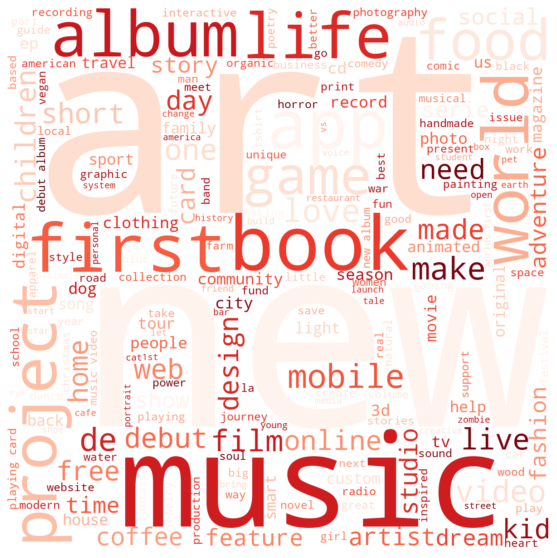

In [94]:
# Start with one review:
new_df = df.query('state != "1"')
my_text = ' '
for name in new_df['name']:
    #print(name)
    my_text = my_text + name
    #text = sub_df['name'][0]
    
# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white', 
                min_font_size = 10, colormap="Reds").generate(my_text)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Most frequencied words in Succesful Projects

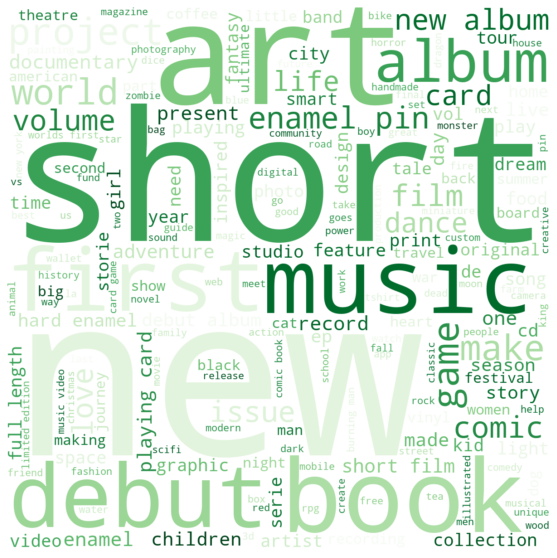

In [95]:
# Start with one review:
new_df = df.query('state != "0"')
my_text = ' '
for name in new_df['name']:
    #print(name)
    my_text = my_text + name
    #text = sub_df['name'][0]
    
# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white', 
                min_font_size = 10,colormap="Greens").generate(my_text)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Add success and failed words column

Difference between top 20 successed and failed?

In [96]:
mydiff = [suc for suc in success_freq[:20].keys() if suc not in failed_freq[:20].keys()]
print(mydiff)

['short', 'debut', 'enamel', 'ep', '2', 'pins', 'cards', 'documentary']


Let's examine the most successful words and most failed words

In [97]:
S = 50
F = 100
print("Successful: In the TOP-50 but not in the TOP-100:")
successed_words_list = [suc for suc in success_freq[:S].keys() if suc not in failed_freq[:F].keys()]
print("success words:",successed_words_list)

S = 70
F = 100
print("Failed: In the TOP-70 but not in the TOP-100:")
failed_words_list = [fail for fail in failed_freq[:S].keys() if fail not in success_freq[:F].keys()]
print("faild words:",failed_words_list)

Successful: In the TOP-50 but not in the TOP-100:
success words: ['enamel', 'pins', 'documentary', 'edition', 'comic', 'pin', 'dance', 'issue', '3', 'volume']
Failed: In the TOP-70 but not in the TOP-100:
faild words: ['app', 'mobile', 'social', 'free', 'truck', 'clothing', 'web', 'online', 'dream', 'community', 'people', 'photography', 'way', 'design', 'real', 'house', 'tv']


In [98]:
success_words_to_search = '|'.join(successed_words_list)
failed_words_to_search = '|'.join(failed_words_list)


originaldf = df[['name','state']]
fdf = originaldf.query('state != "1"')
sdf = originaldf.query('state != "0"')
booldf = sdf['name'].str.contains(success_words_to_search)
success_project_by_success_words = np.sum(booldf)
booldf = fdf['name'].str.contains(success_words_to_search)
failed_project_by_success_words = np.sum(booldf)
print(success_project_by_success_words)
print(failed_project_by_success_words)

booldf = sdf['name'].str.contains(failed_words_to_search)
success_project_by_failed_words = np.sum(booldf)
booldf = fdf['name'].str.contains(failed_words_to_search)
failed_project_by_failed_words = np.sum(booldf)
print(success_project_by_failed_words)
print(failed_project_by_failed_words)


14876
5217
11036
15728


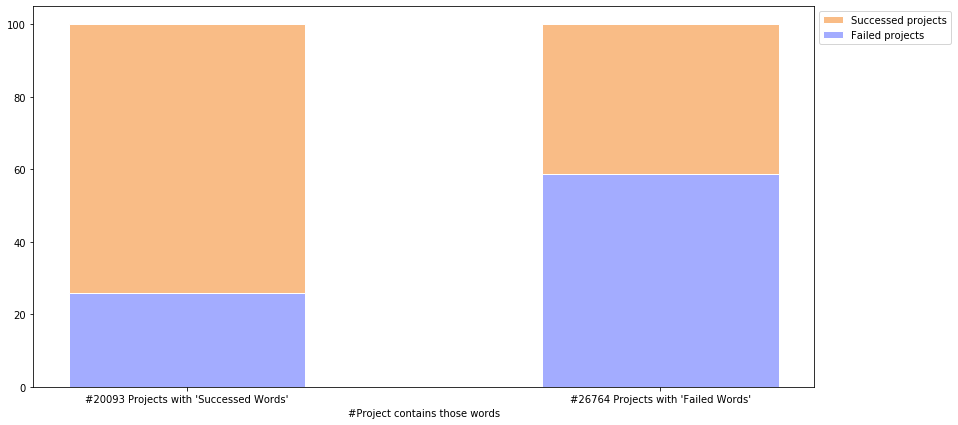

In [99]:
# Data
r = [0,1]
raw_data = {'orangeBars': [success_project_by_success_words, success_project_by_failed_words],
            'blueBars': [failed_project_by_success_words, failed_project_by_failed_words]}
plot_df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(plot_df['orangeBars'], plot_df['blueBars'])]
orangeBars = [i / j * 100 for i,j in zip(plot_df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(plot_df['blueBars'], totals)]
 
# plot
barWidth = 0.5
A = "#" + str(success_project_by_success_words + failed_project_by_success_words) + " Projects with 'Successed Words'"
B = "#" + str(success_project_by_failed_words + failed_project_by_failed_words) + " Projects with 'Failed Words'"
names = (A,B)

# Create orange Bars
label1 = "Successed projects" 
plt.figure( figsize=(14,7) )
plt.bar(r, orangeBars, bottom=blueBars, color='#f9bc86', edgecolor='white', width=barWidth, label=label1)
# Create blue Bars
label2 = "Failed projects"
plt.bar(r, blueBars, color='#a3acff', edgecolor='white', width=barWidth, label=label2)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("#Project contains those words")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show graphic
plt.show()



Let's add this columns in our dataset

In [100]:
#df = df.assign(contains_successed_words = lambda x: x['name'].str.contains(success_words_to_search))
#df = df.assign(contains_failed_words = lambda x: x['name'].str.contains(failed_words_to_search))

df['success_words_name']=df['name'].apply(lambda x:sum(1 for c in x.split(" ") if c in success_words_to_search))
df['failed_words_name']=df['name'].apply(lambda x:sum(1 for c in x.split(" ") if c in failed_words_to_search))
df[['name', 'success_words_name', 'failed_words_name','state']].head(10)

,name,success_words_name,failed_words_name,state
0,net show next entrepreneur trade show,0,0,0
1,purecharger,0,0,0
2,litestem,0,0,0
3,hightech advisor,0,0,0
4,safety beacon worlds smartest road safety device,1,1,0
5,rred navigation révolutionnaire revolutionary...,1,1,0
6,trangafit crutch keeps balance,0,0,0
7,butterfly first ever remote body thermometer,1,1,0
8,mepen innovative stylusmemory modern devices,1,1,0
9,grail,0,0,0


# Project's Blurb

In [101]:
df['blurb'] = df['blurb'].astype(str)

### Char count

In [102]:
df['char_count_blurb'] = df['blurb'].str.len() # this also includes spaces
df[['blurb','char_count_blurb']].nlargest(10, 'char_count_blurb')

,blurb,char_count_blurb
185,Typhon's Wake is about two misfits who are hun...,150
256,Send a photo of your face and I'll collage a p...,150
646,SHE&HER PRODUCTIONS! New Space.. New SHOW! We ...,150
7310,NYC Resistor is a creative technology space in...,150
7322,telegraph21 is a curated video space with a fo...,150
7409,Fixers’ Collective is a social experiment in i...,150
7484,"Miro is a free, non-profit, and open-source vi...",150
7543,This project is focused on raising funding to ...,150
7581,Consuming Blackness Diasporically brings cultu...,150
7586,Micro-invest in a geo-based iPad app that allo...,150


### Number of words

In [103]:
df['word_count_blurb'] = df['blurb'].apply(lambda x: len(str(x).split(" ")))
df[['blurb', 'word_count_blurb']].head()

,blurb,word_count_blurb
0,NET is a trade show exhibiting all that is new...,17
1,Protect your mobile while charging in public s...,12
2,LED headlight incorporated into the bicycle st...,25
3,A series of eBooks that help everyone to under...,17
4,"Cycling, walking, running are activities we go...",23


### Number of upper cases

In [104]:
df['upper_case_blurb']=df['blurb'].apply(lambda x:sum(1 for c in x if c.isupper()))
df[['blurb','upper_case_blurb']].nlargest(10, 'upper_case_blurb')

,blurb,upper_case_blurb
59695,FOCUSED AND DETERMINED TO DELIVER QUALITY AND ...,123
59110,BOOM!!! THIS PROJECT IS TO GET THE PEOPLE ACQU...,118
58320,LIL KANG7 | HEAVY THE HEAD THAT HOLDS THE CROW...,116
59290,THE NEW HOT LP ALBUM AND MIX TAPE THAT WILL MA...,116
140835,I MAKE BEAUTIFUL SPECIALLY LIGHTED ACRYLIC SCU...,116
52167,HELP UNITE SAXOPHONES DRUMS KORAS VOICES BASS...,115
61097,MICHAEL SCOTT EMSKOT EMSKOT2015 JESUSRAP HOLYH...,115
161730,DANAKA DANCE PRESENTS A GLOBAL COLLABORATION O...,115
43756,FIRST RECORDINGS FOR DONRIKOCZAE'S HISTORICAL ...,114
66922,THE THIRD TIME'S THE CHARM AS A STARZ SONG SAI...,114


### To Lower

In [105]:
df['blurb'] = df['blurb'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### Removing stopwords

In [106]:
#stop = stopwords.words('english')
df['blurb'] = df['blurb'].apply(lambda x: " ".join(x for x in str(x).split() if x.lower() not in stop))

### Stemming

In [107]:
#from nltk.stem import PorterStemmer

ps = PorterStemmer()
for blurb in df['blurb']:
    blurb = ps.stem(blurb)

### Removing ponctuation 

In [108]:
df['blurb'] = df['blurb'].str.replace('[^\w\s]','')

### Successed and Failed blurb words

We calculated the top 30 successed words in blurb, and top 30 failed words in blurb. (We removed words that were in both.)

In [109]:
success_blurb = pd.Series(' '.join(df.query('state != "0"')['blurb']).split()).value_counts()
failed_blurb = pd.Series(' '.join(df.query('state != "1"')['blurb']).split()).value_counts()
intersect = list(pd.Series(np.intersect1d(success_blurb[:100].index,failed_blurb[:100].index)))
success_words = [succ for succ in success_blurb[:100].index if succ not in intersect]
failed_words = [fail for fail in failed_blurb[:100].index if fail not in intersect]
print("Succes words are :\n", success_words)
print("Failed words are :\n", failed_words)

Succes words are :
 ['inspired', 'featuring', 'collection', 'songs', 'comic', 'recording', 'documentary', 'were', 'enamel', 'ep', 'dance', 'debut', 'band', 'adventure', 'release', 'part', 'pins', 'cards', 'journey', 'fund', 'card', 'space', 'fantasy', 'man', 'novel', 'comedy', 'city', '2', 'edition']
Failed words are :
 ['app', 'food', 'would', 'looking', 'share', 'around', 'using', 'local', 'online', 'find', 'mobile', 'real', 'social', 'quality', 'business', 'start', 'kids', 'money', 'experience', 'use', 'dream', 'small', 'trying', 'children', 'every', 'place', 'day', 'old', 'build']


Adding a column with number of successful words in blurb, and a column with number of failed words in blurb

In [110]:
df['success_words_blurb']=df['blurb'].apply(lambda x:sum(1 for c in x.split(" ") if c in success_words))
df['failed_words_blurb']=df['blurb'].apply(lambda x:sum(1 for c in x.split(" ") if c in failed_words))
df[['blurb', 'success_words_blurb', 'failed_words_blurb','state']].head(10)

,blurb,success_words_blurb,failed_words_blurb,state
0,net trade show exhibiting new exciting technol...,0,1,0
1,protect mobile charging public spots earn rewa...,0,1,0
2,led headlight incorporated bicycle stem swivel...,0,0,0
3,series ebooks help everyone understand latest ...,0,0,0
4,cycling walking running activities go great le...,0,0,0
5,navigation intuitive et sécuritaire pour motos...,0,0,0
6,trangafit extremely simple device maintain cru...,0,1,0
7,first ever 247 remote body thermometer measure...,0,1,0
8,mepen stylus memory maximize creative experien...,0,1,0
9,grail carbon monoxidenatural gaspropane detect...,0,0,0


# 10. Photos

first, we extracted the url of the best quality image of all projects from the data sets. Then, we downloaded all the photos to the computer in order to run the image quality assesment algorithm on them.<br>
<br>The algorithm we used is BRISQUE (Blind/Referenceless Image Spatial Quality Evaluator). code is at: https://github.com/spmallick/learnopencv/tree/master/ImageMetrics/Python
<br><br>In short, the algorithm calculates the no-reference image quality score for image A using the Blind/Referenceless Image Spatial Quality Evaluator (BRISQUE). brisque compare A to a default model computed from images of natural scenes with similar distortions. A smaller score indicates better perceptual quality. It predicts score by using a support vector regression (SVR) model trained on an image database with corresponding differential mean opinion score (DMOS) values. The database contains images with known distortion such as compression artifacts, blurring, and noise, and it contains pristine versions of the distorted images

In [111]:
photo_score_df =  pd.read_csv("photo_scores.csv")
df = df.merge(photo_score_df, on='id')
df.shape
df.head(5)

,id,min_reward_price,max_reward_price,avg_reward_price,num_of_reward_options,index,Creator_ID,Num_projects,name,launched_at,...,avg_word_name,stopwords_name,success_words_name,failed_words_name,char_count_blurb,word_count_blurb,upper_case_blurb,success_words_blurb,failed_words_blurb,photo_score
0,1.610438e+09,0.200000,4.000000,1.540000,5,1,1029590798,1,net show next entrepreneur trade show,1437450938,...,5.666667,0,0,0,96,17,6,0,1,85.408425
1,2.127141e+09,0.007000,9.999000,0.977091,11,2,1554074090,1,purecharger,1466084518,...,12.000000,0,0,0,73,12,1,0,1,33.744365
2,1.353155e+09,0.500000,2.500000,1.500000,2,3,892489289,1,litestem,1459779677,...,8.000000,0,0,0,135,25,4,0,0,40.708267
3,2.969102e+08,0.040800,20.300752,3.289037,10,4,1398586789,1,hightech advisor,1416983071,...,7.500000,0,0,0,107,17,2,0,0,90.984537
4,2.009359e+09,0.004654,15.273997,2.267431,7,5,2105876114,1,safety beacon worlds smartest road safety device,1457865064,...,5.222222,1,1,1,135,23,2,0,0,24.084525


num of project with score_photo less than  10  is  25637
num of project with score_photo less than  20  is  54440
num of project with score_photo less than  30  is  84879
num of project with score_photo less than  40  is  116240
num of project with score_photo less than  50  is  146305
num of project with score_photo less than  60  is  173066
num of project with score_photo less than  70  is  194683
num of project with score_photo less than  80  is  211727
num of project with score_photo less than  90  is  224439
num of project with score_photo less than  100  is  243113


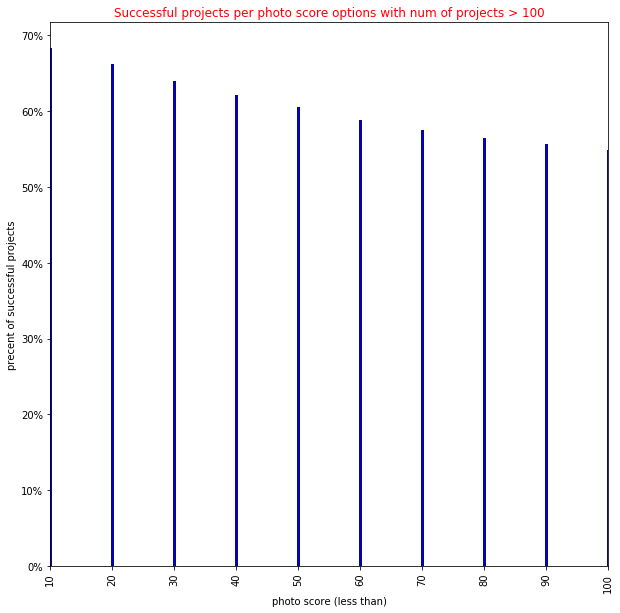

In [112]:

successful_option = []
r_options = [i*10 for i in range (1,11)]
options = []
for o in r_options:
    d = df.loc[df['photo_score'] <= o].copy()
    if(d.shape[0] > 100):
        successful_option.append( d.loc[d['state'] == 1].shape[0] / d.shape[0])
        options.append(o)
        print("num of project with score_photo less than ",o," is ",d.shape[0])
plt.figure(figsize=(10,10))
plt.bar(options, successful_option, width = 0.5, color='#0504aa')
plt.xlim(min(options), max(options))
plt.xticks(options,rotation='vertical')
#plt.yticks(fontsize=50)
plt.title("Successful projects per photo score options with num of projects > 100", color='red')
plt.ylabel("precent of successful projects")
plt.xlabel("photo score (less than)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

#### Photo_score statistics

We divide the projects to the ones with photo_score less than 20, considered as good quality photos,
and the projects with photo_score greater than 80, considered as bad quality photos

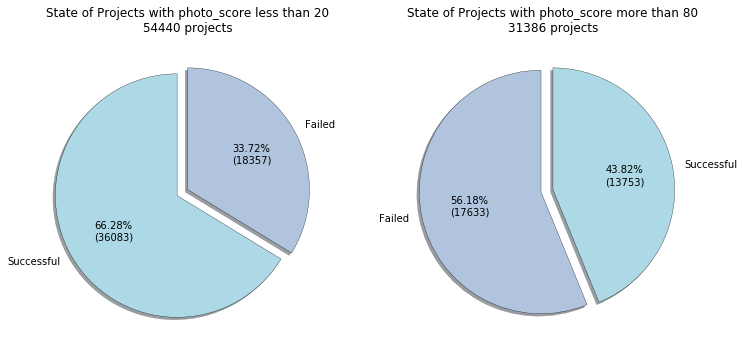

In [113]:
# create a figure with two subplots
fig, axs = plt.subplots(1, 2,figsize=(12,12))

#fig.suptitle("Success and Failed Distribution according to photo_score", fontsize="x-large", fontweight="bold")

# plot each pie chart in a separate subplot
data = df[(df["photo_score"] < 20)]["state"].value_counts()
total = sum(data)
sizes = [round(((x/total)*100),2) for x in data]
labels=d.index.tolist()
colors=['lightblue','lightsteelblue']
axs[0].pie(sizes, labels=['Successful', 'Failed'], autopct=lambda pct: func(pct, data), shadow=True, startangle=90, colors=colors, wedgeprops={"edgecolor":"0", "linewidth":"0.3"}, explode=(0.1, 0))
axs[0].set_title("State of Projects with photo_score less than 20\n{} projects".format(total))

data = df[(df["photo_score"] > 80)]["state"].value_counts()
total = sum(data)
sizes = [round(((x/total)*100),2) for x in data]
labels=d.index.tolist()
colors=['lightsteelblue','lightblue']
axs[1].pie(sizes, labels=['Failed', 'Successful'], autopct=lambda pct: func(pct, data), shadow=True, startangle=90, colors=colors, wedgeprops={"edgecolor":"0", "linewidth":"0.3"}, explode=(0.1, 0))
axs[1].set_title("State of Projects with photo_score more than 80\n{} projects".format(total))

plt.show()

# 10. Columns Summary

In [114]:
df.columns

Index(['id', 'min_reward_price', 'max_reward_price', 'avg_reward_price',
       'num_of_reward_options', 'index', 'Creator_ID', 'Num_projects', 'name',
       'launched_at', 'created_at', 'deadline', 'country', 'state', 'goal',
       'currency', 'urls', 'creator', 'location', 'photo', 'staff_pick',
       'blurb', 'deadline_at', 'launched', 'created', 'usd_goal_real',
       'main_category', 'sub_category', 'launched_time', 'deadline_time',
       'duration', 'state_original', 'log_usd_goal', 'count_7_days',
       'category_count_7_days', 'time_deltas', 'num_capital_letters',
       'num_special_chars', 'launch_year', 'launch_month', 'deadline_month',
       'launch_day', 'deadline_day', 'launched_dayweek', 'inUSA',
       'top_cat_inUSA', 'bottom_cat_inUSA', 'top_cat_out', 'bottom_cat_out',
       'country_GDP', 'country_happiness', 'char_count_name',
       'word_count_name', 'avg_word_name', 'stopwords_name',
       'success_words_name', 'failed_words_name', 'char_count_blurb',
  

## Type Conversions Again

In [115]:
df.dtypes

id                       float64
min_reward_price         float64
max_reward_price         float64
avg_reward_price         float64
num_of_reward_options      int64
                          ...   
word_count_blurb           int64
upper_case_blurb           int64
success_words_blurb        int64
failed_words_blurb         int64
photo_score              float64
Length: 63, dtype: object

# 11. MODEL

In the last chapter, we ran a RandomForest baseline model based on the basic features.<br>
After that, we ran a RandomForest on a variety of features, and investigated which features contributes.<br>
Finally, in order to improve out accuracy we looked for a more precised model, and focused on LightGBM.

#### First - prepare the dataset


Let's encode the categorical features

In [116]:
# TODO: remove it
from sklearn.utils import shuffle
df = shuffle(df)

In [117]:
from sklearn.preprocessing import LabelEncoder

cat_features = ['sub_category','main_category','country']
encoder = LabelEncoder()

# Apply the label encoder to each column
encoded = df[cat_features].apply(encoder.fit_transform)
encoded.head(10)


,sub_category,main_category,country
94123,154,6,21
159363,32,2,21
187976,0,13,21
240584,56,11,21
11315,67,13,21
182448,104,11,18
190481,142,14,21
92267,154,6,21
135423,17,2,9
151365,70,0,21


Divide the dataset into basic_data (to RandomForest baseline model) and all_data (selected features)

In [118]:
# Since our df and the encoded have the same index and we can join them
basic_data = df[['usd_goal_real','duration','state']].join(encoded)

all_data = df[['state','log_usd_goal','duration','count_7_days', 'category_count_7_days','staff_pick',
           'launch_year', 'launch_month', 'launch_day',
           'deadline_month','deadline_day','launched_dayweek',
           'Num_projects',
       'time_deltas', 'num_capital_letters', 'num_special_chars',
       'inUSA', 'top_cat_inUSA', 'bottom_cat_inUSA', 'top_cat_out','bottom_cat_out',
       'min_reward_price','max_reward_price','avg_reward_price','num_of_reward_options',
       'country_GDP','country_happiness',
       'char_count_name', 'word_count_name', 'avg_word_name', 'stopwords_name','success_words_name', 'failed_words_name',
       'char_count_blurb','word_count_blurb', 'upper_case_blurb', 'success_words_blurb','failed_words_blurb',
              "photo_score"
          ]].join(encoded)
all_data.head()



,state,log_usd_goal,duration,count_7_days,category_count_7_days,staff_pick,launch_year,launch_month,launch_day,deadline_month,...,failed_words_name,char_count_blurb,word_count_blurb,upper_case_blurb,success_words_blurb,failed_words_blurb,photo_score,sub_category,main_category,country
94123,0,3.653213,28,1098,153,0,2015,2,25,3,...,0,125,27,6,0,0,17.399505,154,6,21
159363,1,3.397940,30,403,5,0,2014,3,18,4,...,0,101,20,1,0,0,12.741942,32,2,21
187976,0,4.000000,30,307,53,0,2016,12,22,1,...,0,118,19,4,0,1,15.675569,0,13,21
240584,0,3.397940,30,497,14,0,2019,9,13,10,...,0,132,23,5,0,1,36.326007,56,11,21
11315,0,3.602060,17,911,122,0,2014,10,9,10,...,0,125,17,4,0,0,30.873649,67,13,21


First, create from basic_data - train, valid and test sets

In [119]:
from sklearn.utils import shuffle
# pay attention: we shuffled the data here so the distribution of train, valid and test will be similiar
#basic_data = shuffle(basic_data)

valid_fraction = 0.1
valid_size = int(len(basic_data) * valid_fraction)

train = basic_data[:-2 * valid_size]
valid = basic_data[-2 * valid_size:-valid_size]
test = basic_data[-valid_size:]

for each in [train, valid, test]:
    print(f"Outcome fraction = {each.state.mean():.4f}")


Outcome fraction = 0.5494
Outcome fraction = 0.5496
Outcome fraction = 0.5440


## Random Forest

### Basic \ Baseline Random Forest Model
#### Learning features: usd_goal_real, main_category, sub_category, country and duration by state

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics

feature_cols = train.columns.drop('state')
X = train[feature_cols]
Y = train['state']
rfc = RandomForestClassifier(criterion='entropy', n_estimators=30, n_jobs=1, max_depth = int(np.log2(X.shape[0])), 
                             class_weight='balanced')
rfc.fit(X, Y)

ypred = rfc.predict(test[feature_cols])
score = metrics.roc_auc_score(test['state'], ypred)
score
print("AUC Score :{0:0.4f}".format(score))

AUC Score :0.7447


##### Confusion matrix and score

In [121]:
from sklearn.metrics import precision_recall_fscore_support as score
X_train = train[feature_cols]
y_train = train['state']
X_test = test[feature_cols]
y_test = test['state']
print("Score train :{0:0.2f}%".format(rfc.score(X_train, y_train)*100))
print("score test:{0:0.2f}%".format(rfc.score(X_test, y_test)*100))
proba = rfc.predict_proba(X_test)

average_precision_round = average_precision_score(test['state'], ypred)
precision, recall, fscore, support= score(test['state'], ypred, average='binary')
print("Precision : {0:0.2f}%".format(precision*100), '\nRecall : {0:0.2f}%'.format(recall*100), '\nfScore : {0:0.2f}%'.format(fscore*100))
print ("accuracy:{0:0.2f}%".format(accuracy_score(y_test, ypred)*100))
print("confusion matrix: \n", confusion_matrix(y_test, ypred))
print('Average precision-recall score: {0:0.2f}%'.format( average_precision_round*100))


Score train :81.25%
score test:74.33%
Precision : 78.42% 
Recall : 72.86% 
fScore : 75.54%
accuracy:74.33%
confusion matrix: 
 [[8436 2651]
 [3589 9635]]
Average precision-recall score: 71.90%


##### Feature Importance

In [122]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(basic_data.columns.drop('state')[indices[f]]," --> (%f) " % (importances[indices[f]]))


Feature ranking:
sub_category  --> (0.422816) 
usd_goal_real  --> (0.249284) 
main_category  --> (0.149590) 
duration  --> (0.131594) 
country  --> (0.046715) 


## Prepare the all_data train, valid and test sets

In [123]:
# pay attention: we shuffled the data here so the distribution of train, valid and test will be similiar
#all_data = shuffle(all_data)

valid_fraction = 0.1
valid_size = int(len(all_data) * valid_fraction)

train = all_data[:-2 * valid_size]
valid = all_data[-2 * valid_size:-valid_size]
test = all_data[-valid_size:]

for each in [train, valid, test]:
    print(f"Outcome fraction = {each.state.mean():.4f}")

Outcome fraction = 0.5494
Outcome fraction = 0.5496
Outcome fraction = 0.5440


## Random Forest - Selected Features

#### Run Random Forest on the new dataset

In [124]:
feature_cols = train.columns.drop('state')

X_train = train[feature_cols]
y_train = train['state']
X_test = test[feature_cols]
y_test = test['state']

rfc = RandomForestClassifier(criterion='entropy', n_estimators=30, n_jobs=1, max_depth = int(np.log2(X_train.shape[0])), 
                             class_weight='balanced')
rfc.fit(X_train, y_train)
ypred = rfc.predict(X_test)
score = metrics.roc_auc_score(y_test, ypred)
score
print("AUC Score :{0:0.4f}".format(score))

AUC Score :0.7998


#### Confusion matrix and score

In [125]:
from sklearn.metrics import average_precision_score, accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
print("Score train :{0:0.2f}%".format(rfc.score(X_train, y_train)*100))
print("score test:{0:0.2f}%".format(rfc.score(X_test, y_test)*100))
proba = rfc.predict_proba(X_test)

average_precision_round = average_precision_score(test['state'], ypred)
precision, recall, fscore, support= score(test['state'], ypred, average='binary')
print("Precision : {0:0.2f}%".format(precision*100), '\nRecall : {0:0.2f}%'.format(recall*100), '\nfScore : {0:0.2f}%'.format(fscore*100))
print ("accuracy:{0:0.2f}%".format(accuracy_score(y_test, ypred)*100))
print("confusion matrix: \n", confusion_matrix(y_test, ypred))
print('Average precision-recall score: {0:0.2f}%'.format( average_precision_round*100))

Score train :89.67%
score test:80.36%
Precision : 80.50% 
Recall : 84.33% 
fScore : 82.37%
accuracy:80.36%
confusion matrix: 
 [[ 8385  2702]
 [ 2072 11152]]
Average precision-recall score: 76.41%


#### Feature Importance

In [126]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(X_train.columns[indices[f]]," --> (%f) " % ( importances[indices[f]]))

Feature ranking:
num_of_reward_options  --> (0.106104) 
avg_reward_price  --> (0.086560) 
sub_category  --> (0.071720) 
log_usd_goal  --> (0.071285) 
staff_pick  --> (0.067885) 
max_reward_price  --> (0.047300) 
count_7_days  --> (0.044693) 
Num_projects  --> (0.036092) 
min_reward_price  --> (0.034814) 
launch_year  --> (0.032576) 
photo_score  --> (0.031890) 
main_category  --> (0.025582) 
category_count_7_days  --> (0.025502) 
duration  --> (0.022233) 
bottom_cat_inUSA  --> (0.022144) 
time_deltas  --> (0.018658) 
char_count_name  --> (0.018218) 
avg_word_name  --> (0.016682) 
char_count_blurb  --> (0.015203) 
top_cat_out  --> (0.014919) 
num_capital_letters  --> (0.014587) 
bottom_cat_out  --> (0.014389) 
deadline_day  --> (0.013730) 
word_count_blurb  --> (0.013466) 
launch_day  --> (0.013377) 
top_cat_inUSA  --> (0.012836) 
word_count_name  --> (0.011921) 
upper_case_blurb  --> (0.011734) 
country_happiness  --> (0.011138) 
launch_month  --> (0.010029) 
deadline_month  --> (0.009

## LightGBM

https://lightgbm.readthedocs.io/en/latest/Python-API.html?highlight=importance#lightgbm.LGBMModel.booster_

In [127]:
import lightgbm as lgb

feature_cols = train.columns.drop('state')

dtrain = lgb.Dataset(train[feature_cols], label=train['state'])
dvalid = lgb.Dataset(valid[feature_cols], label=valid['state'])

param = {'num_leaves': 64, 'objective': 'binary', 'metric' : 'auc'}
#param['metric'] = 'auc'
num_round = 1000
bst = lgb.train(param, dtrain, num_round, valid_sets=[dvalid], early_stopping_rounds=30, verbose_eval=False)

Based on the LightGBM documentation, we cannot get predicted classes directly from LightGBM. The default prediction is, of course, predicted probabilities.
Setting the parameter objective:'binary', only informs the model about the kind of problem, which in this case in Binary classification. This would require your target variables to be {0,1}.

So we want to convert the probabilities to classes using a threshold. Deciding a threshold is tricky, and depends upon the nature of the problem you're solving, and the level of imbalance in the training data.

For a highly imbalanced dataset, using the standard 0.5 as the threshold won't be correct.
Our dataset is pretty balance (46%-54%, so using the standard 0.5 as the treshold gave us good precitions.
(We tried several thresholds - in the range of 0.46-0.54)


#### Confusion Matrix and Score

In [128]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# prediction
ypred = bst.predict(test[feature_cols])
ypred_round = np.round_(ypred)
#ypred_round = np.round_(ypred + 0.04)

#score = metrics.roc_auc_score(test['state'], ypred)
#print(f"Test AUC score for ypred: {score:.4f}")

# confusion matrix and AUC score
score_round = metrics.roc_auc_score(test['state'], ypred_round)
matrix = confusion_matrix(test['state'], ypred_round)
print(f"Test AUC score for ypred_round: {score_round:.4f}")
print("The confusion Matrix is :\n", matrix )
print()
# Precision, Recall, fScore, Accuract and AVG precision-recall score
precision, recall, fscore, support= score(test['state'], ypred_round, average='binary')
accuracy = accuracy_score(test['state'], ypred_round)
average_precision_round = average_precision_score(test['state'], ypred_round)

print("Precision : {0:0.2f}%".format(precision*100), '\nRecall : {0:0.2f}%'.format(recall*100), '\nfScore : {0:0.2f}%'.format(fscore*100))
print("Accuracy : {0:0.2f}%".format(accuracy*100))
print('Average precision-recall score: {0:0.2f}%'.format( average_precision_round*100))

Test AUC score for ypred_round: 0.8312
The confusion Matrix is :
 [[ 8999  2088]
 [ 1973 11251]]

Precision : 84.35% 
Recall : 85.08% 
fScore : 84.71%
Accuracy : 83.30%
Average precision-recall score: 79.88%


#### Feature Importance

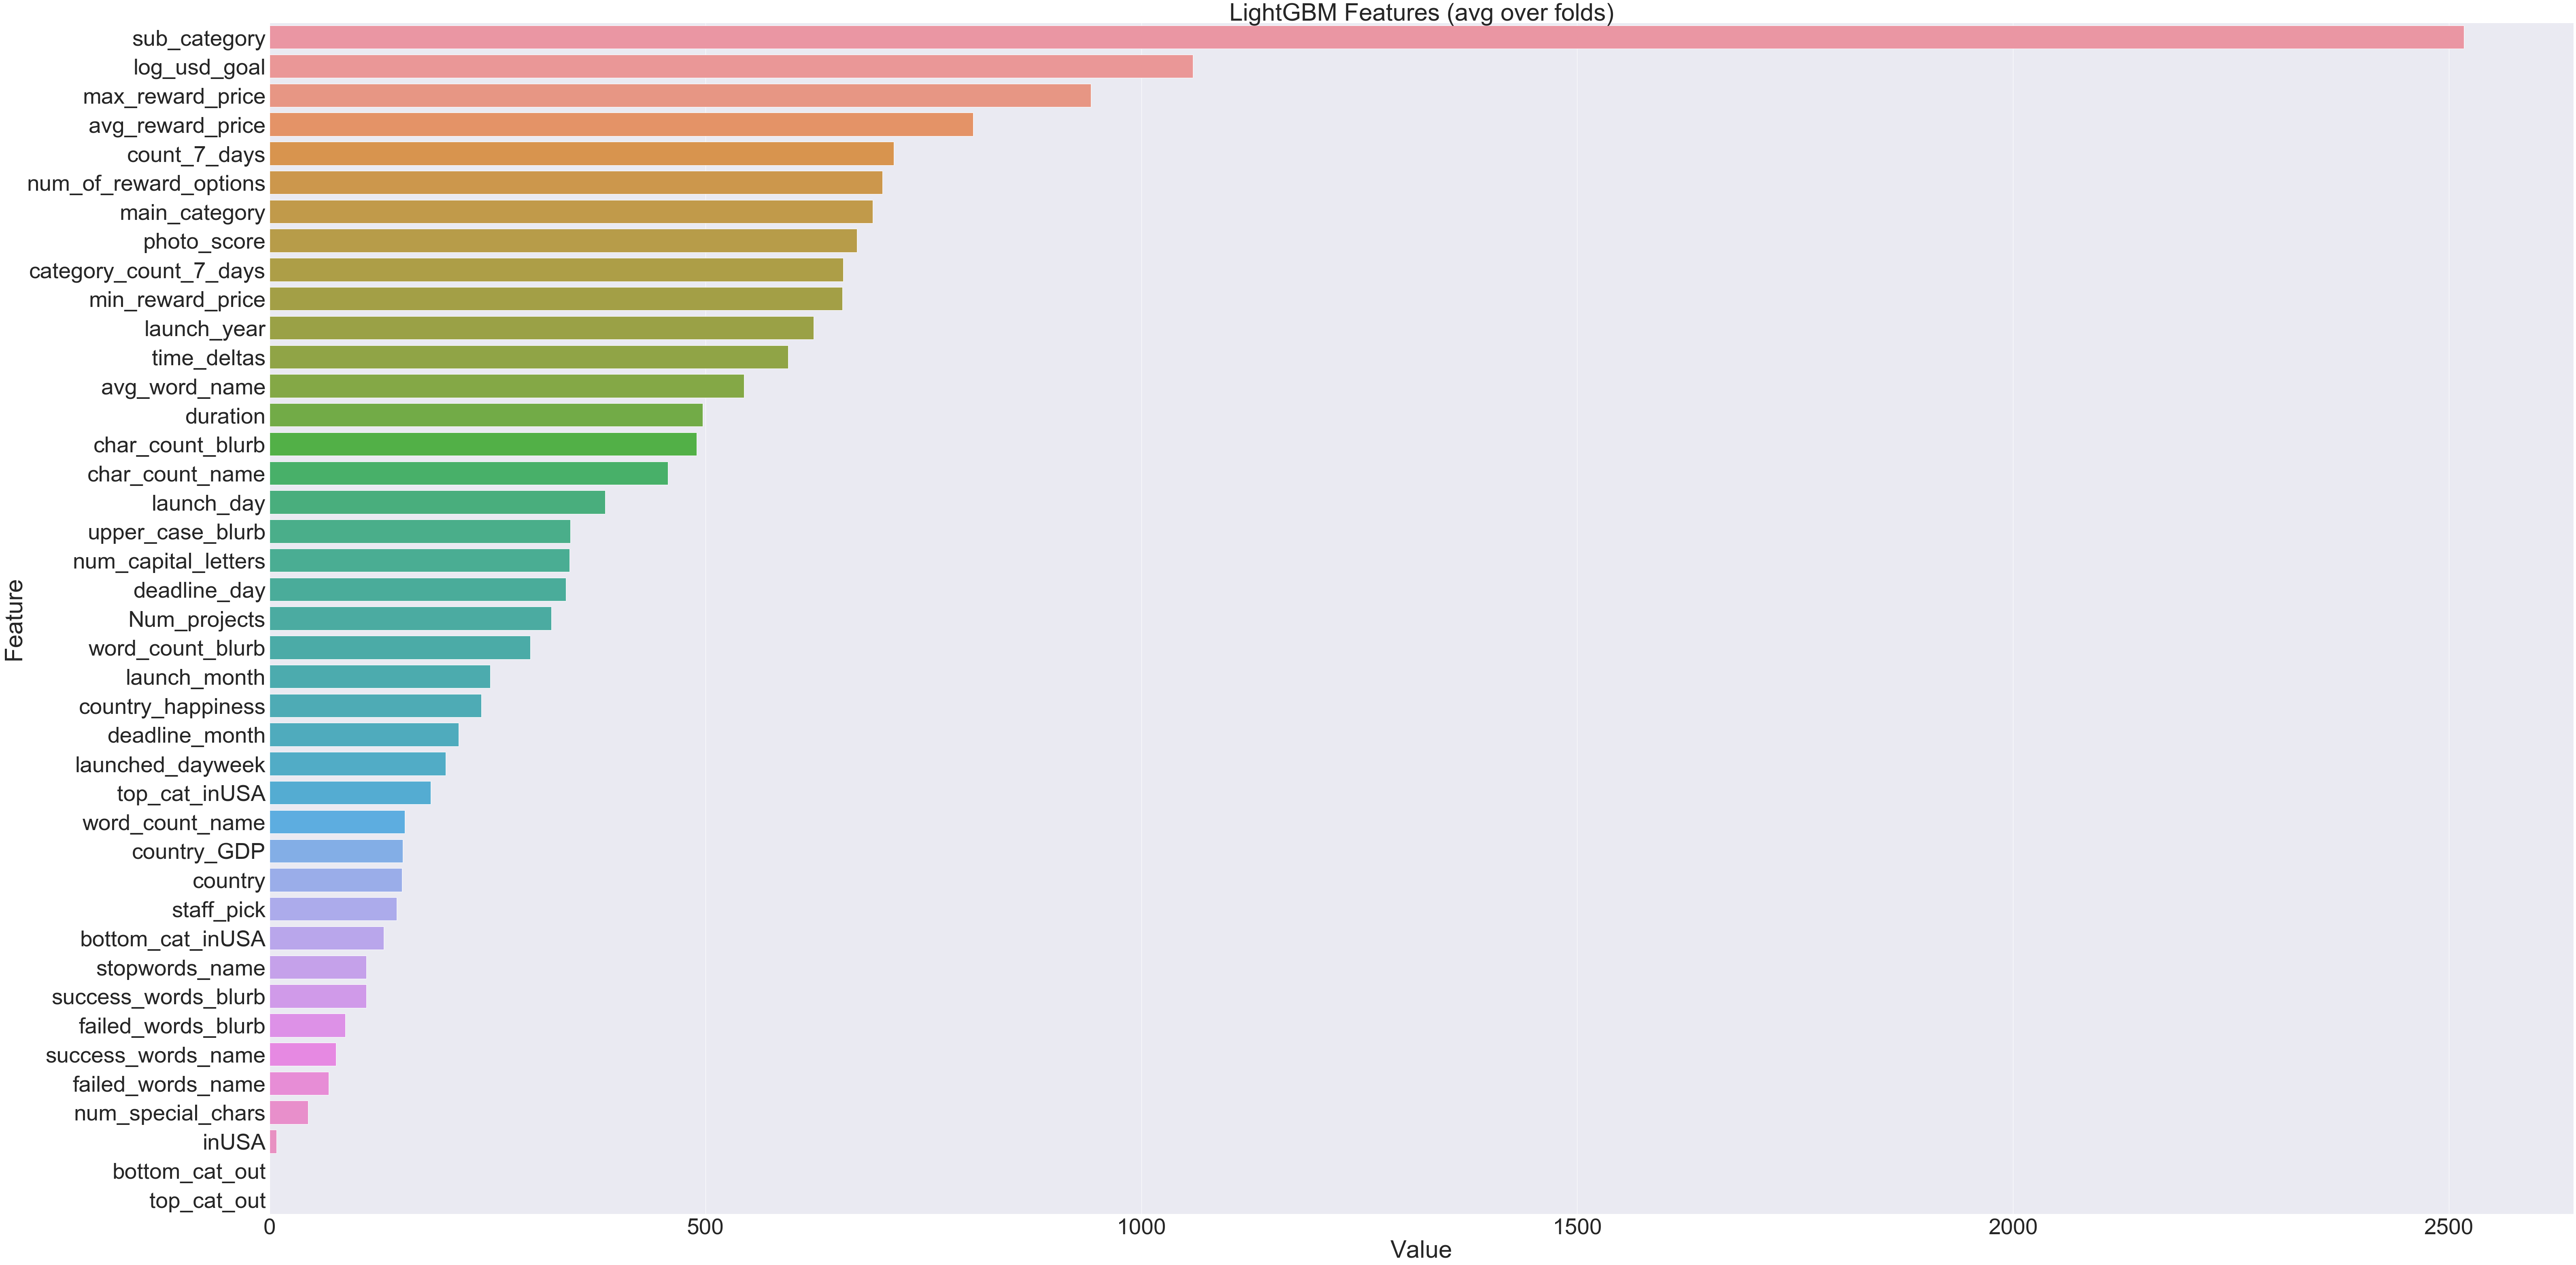

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 50):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
    plt.figure(figsize=(90, 45))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
                                                    
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    #plt.savefig('lgbm_importances-01.png')
    plt.show()
    
plotImp(bst,train[feature_cols])

#### Summary

In our own, we managed to get ~84% accuracy.<br><br>
While working together with the the second team, we decided to base our collaboral work on their project, and sharing our different features (by external CSVs or by sharing the code).<br>
We combined our diversed features:
- Rewards Features (Min/Goal, Max/Goal, AVG/Goal, #number_of_rewards)
- Photo Score
- Count7Days
- CategoryCount7Days
- Log Goal

<br><b>By that, We managed to improve our combined accuracy by 6% from 84% to about 90%, with 0.81 Recall and 0.9 precision(!!!)</b>